# Proje Özeti
Enerjinin tüketiminin planlanması gelecekte daha temiz bir dünya için kaçınılmaz bir süreç haline gelmiştir. 
Bu projenin öncelikli hedefi de Kaggle'da bulunan İspanya'nın 2015-2019 yılları arasındaki 4 yıllık
enerji talepleri datasını kullanarak, gelecekteki talebi tahmin etmek ve onu İspanya'daki Transmission Service Operator(TSO) kurumunun yaptığı tahminlerle karşılaştırmaktır.

# Data Wrangling and EDA

In [2]:
!pip install tensorflow scikeras scikit-learn
!pip install holidays


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import tensorflow as tf
import holidays
import time

from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from scikeras.wrappers import KerasRegressor
pd.set_option("display.max_colwidth", 40)


In [2]:
df = pd.read_csv('energy_dataset.csv')

df.head(-1)

time  generation biomass  \
0      2015-01-01 00:00:00+01:00               447.0   
1      2015-01-01 01:00:00+01:00               449.0   
2      2015-01-01 02:00:00+01:00               448.0   
3      2015-01-01 03:00:00+01:00               438.0   
4      2015-01-01 04:00:00+01:00               428.0   
...                          ...                 ...   
35058  2018-12-31 18:00:00+01:00               293.0   
35059  2018-12-31 19:00:00+01:00               297.0   
35060  2018-12-31 20:00:00+01:00               296.0   
35061  2018-12-31 21:00:00+01:00               292.0   
35062  2018-12-31 22:00:00+01:00               293.0   

       generation fossil brown coal/lignite  \
0                                     329.0   
1                                     328.0   
2                                     323.0   
3                                     254.0   
4                                     187.0   
...                                     ...   
35058                                   0.0   
35059                                   0.0   
35060                                   0.0   
35061                                   0.0   
35062                                   0.0   

       generation fossil coal-derived gas  generation fossil gas  \
0                                     0.0                 4844.0   
1                                     0.0                 5196.0   
2                                     0.0                 4857.0   
3                                     0.0                 4314.0   
4                                     0.0                 4130.0   
...                                   ...                    ...   
35058                                 0.0                 7593.0   
35059                                 0.0                 7634.0   
35060                                 0.0                 7241.0   
35061                                 0.0                 7025.0   
35062                                 0.0                 6562.0   

       generation fossil hard coal  generation fossil oil  \
0                           4821.0                  162.0   
1                           4755.0                  158.0   
2                           4581.0                  157.0   
3                           4131.0                  160.0   
4                           3840.0                  156.0   
...                            ...                    ...   
35058                       2604.0                  178.0   
35059                       2628.0                  178.0   
35060                       2566.0                  174.0   
35061                       2422.0                  168.0   
35062                       2293.0                  163.0   

       generation fossil oil shale  generation fossil peat  \
0                              0.0                     0.0   
1                              0.0                     0.0   
2                              0.0                     0.0   
3                              0.0                     0.0   
4                              0.0                     0.0   
...                            ...                     ...   
35058                          0.0                     0.0   
35059                          0.0                     0.0   
35060                          0.0                     0.0   
35061                          0.0                     0.0   
35062                          0.0                     0.0   

       generation geothermal  ...  generation waste  generation wind offshore  \
0                        0.0  ...             196.0                       0.0   
1                        0.0  ...             195.0                       0.0   
2                        0.0  ...             196.0                       0.0   
3                        0.0  ...             191.0                       0.0   
4                        0.0  ...             189.0                       0.0   
...      

In [3]:
df.describe()

generation biomass  generation fossil brown coal/lignite  \
count        35045.000000                          35046.000000   
mean           383.513540                            448.059208   
std             85.353943                            354.568590   
min              0.000000                              0.000000   
25%            333.000000                              0.000000   
50%            367.000000                            509.000000   
75%            433.000000                            757.000000   
max            592.000000                            999.000000   

       generation fossil coal-derived gas  generation fossil gas  \
count                             35046.0           35046.000000   
mean                                  0.0            5622.737488   
std                                   0.0            2201.830478   
min                                   0.0               0.000000   
25%                                   0.0            4126.000000   
50%                                   0.0            4969.000000   
75%                                   0.0            6429.000000   
max                                   0.0           20034.000000   

       generation fossil hard coal  generation fossil oil  \
count                 35046.000000           35045.000000   
mean                   4256.065742             298.319789   
std                    1961.601013              52.520673   
min                       0.000000               0.000000   
25%                    2527.000000             263.000000   
50%                    4474.000000             300.000000   
75%                    5838.750000             330.000000   
max                    8359.000000             449.000000   

       generation fossil oil shale  generation fossil peat  \
count                      35046.0                 35046.0   
mean                           0.0                     0.0   
std                            0.0                     0.0   
min                            0.0                     0.0   
25%                            0.0                     0.0   
50%                            0.0                     0.0   
75%                            0.0                     0.0   
max                            0.0                     0.0   

       generation geothermal  generation hydro pumped storage aggregated  ...  \
count                35046.0                                      0.0     ...   
mean                     0.0                                      NaN     ...   
std                      0.0                                      NaN     ...   
min                      0.0                                      NaN     ...   
25%                      0.0                                      NaN     ...   
50%                      0.0                                      NaN     ...   
75%                      0.0                                      NaN     ...   
max                      0.0                                      NaN     ...   

       generation waste  generation wind offshore  generation wind onshore  \
count      35045.000000                   35046.0             35046.000000   
mean         269.452133                       0.0              5464.479769   
std           50.195536                       0.0              3213.691587   
min            0.000000                       0.0                 0.000000   
25%          240.000000                       0.0              2933.000000   
50%          279.000000                       0.0              4849.000000   
75%          310.000000                       0.0              7398.000000   
max          357.000000                       0.0             17436.000000   

       forecast solar day ahead  forecast wind offshore eday ahead  \
count              35064.000000                                0.0   
mean                1439.066735                                NaN   
std                 1677.703355       

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [5]:
corr = df.corr()
print(corr['total load actual'].sort_values(ascending=False).to_string())

total load actual                              1.000000
total load forecast                            0.995139
generation fossil gas                          0.548913
generation fossil oil                          0.497089
generation hydro water reservoir               0.479481
price day ahead                                0.473869
price actual                                   0.436127
forecast solar day ahead                       0.404362
generation fossil hard coal                    0.396564
generation solar                               0.396189
generation fossil brown coal/lignite           0.280461
generation other renewable                     0.181714
generation hydro run-of-river and poundage     0.118570
generation other                               0.100690
generation nuclear                             0.085664
generation biomass                             0.083288
generation waste                               0.077312
generation wind onshore                        0

<AxesSubplot:>

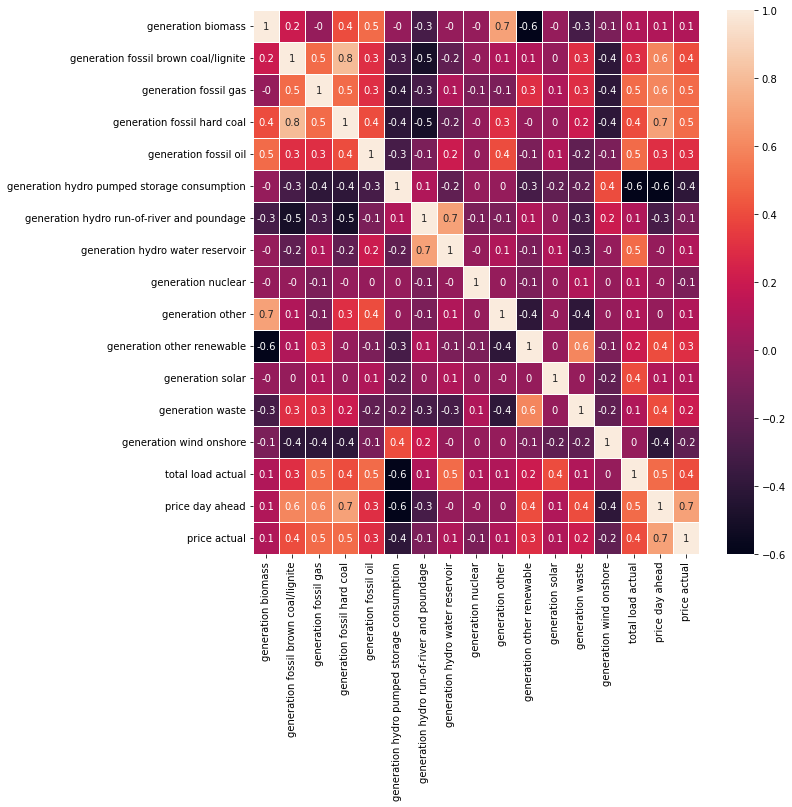

In [6]:
#extract the nan columns with 0 correlation to total load actual
nan_colms= ['generation fossil coal-derived gas',
           'generation fossil oil shale',
           'generation fossil peat',
           'generation geothermal',
           'generation hydro pumped storage aggregated',
           'generation marine',
           'generation wind offshore',
           'forecast wind offshore eday ahead',
           'forecast wind onshore day ahead',
           'forecast solar day ahead',
           'total load forecast']

new_df = df.drop(columns = nan_colms, axis = 1)

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(round(new_df.corr(),1),annot=True,linewidth=0.9,ax=ax )

In [7]:
#Nan değerleri kontrol edelim
new_df.isnull().sum()

time                                            0
generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind onshore                        18
total load actual                              36
price day ahead                                 0
price actual                                    0
dtype: int64

In [8]:
#Kaç tane 0 değer olduğunu hesaplayalım
new_df.eq(0).sum()

time                                               0
generation biomass                                 4
generation fossil brown coal/lignite           10517
generation fossil gas                              1
generation fossil hard coal                        3
generation fossil oil                              3
generation hydro pumped storage consumption    12607
generation hydro run-of-river and poundage         3
generation hydro water reservoir                   3
generation nuclear                                 3
generation other                                   4
generation other renewable                         3
generation solar                                   3
generation waste                                   3
generation wind onshore                            3
total load actual                                  0
price day ahead                                    0
price actual                                       0
dtype: int64

In [9]:
new_df.shape

(35064, 18)

In [10]:
# NAN değerleri linear bir şekilde doldurduk, yani NaN, öncesindeki ve sonrasındaki değerlerin toplamının yarısı 
# olarak değiştirildi. Model accuracy'si denenirken, farklı doldurma yöntemleri de denenebilir.
new_df = new_df.interpolate(method ='linear', limit_direction ='forward')

new_df.isnull().sum()

time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
total load actual                              0
price day ahead                                0
price actual                                   0
dtype: int64

In [11]:
copy_df = new_df
new_df.eq(0).sum()

time                                               0
generation biomass                                 4
generation fossil brown coal/lignite           10524
generation fossil gas                              1
generation fossil hard coal                        3
generation fossil oil                              3
generation hydro pumped storage consumption    12614
generation hydro run-of-river and poundage         3
generation hydro water reservoir                   3
generation nuclear                                 3
generation other                                   4
generation other renewable                         3
generation solar                                   3
generation waste                                   3
generation wind onshore                            3
total load actual                                  0
price day ahead                                    0
price actual                                       0
dtype: int64

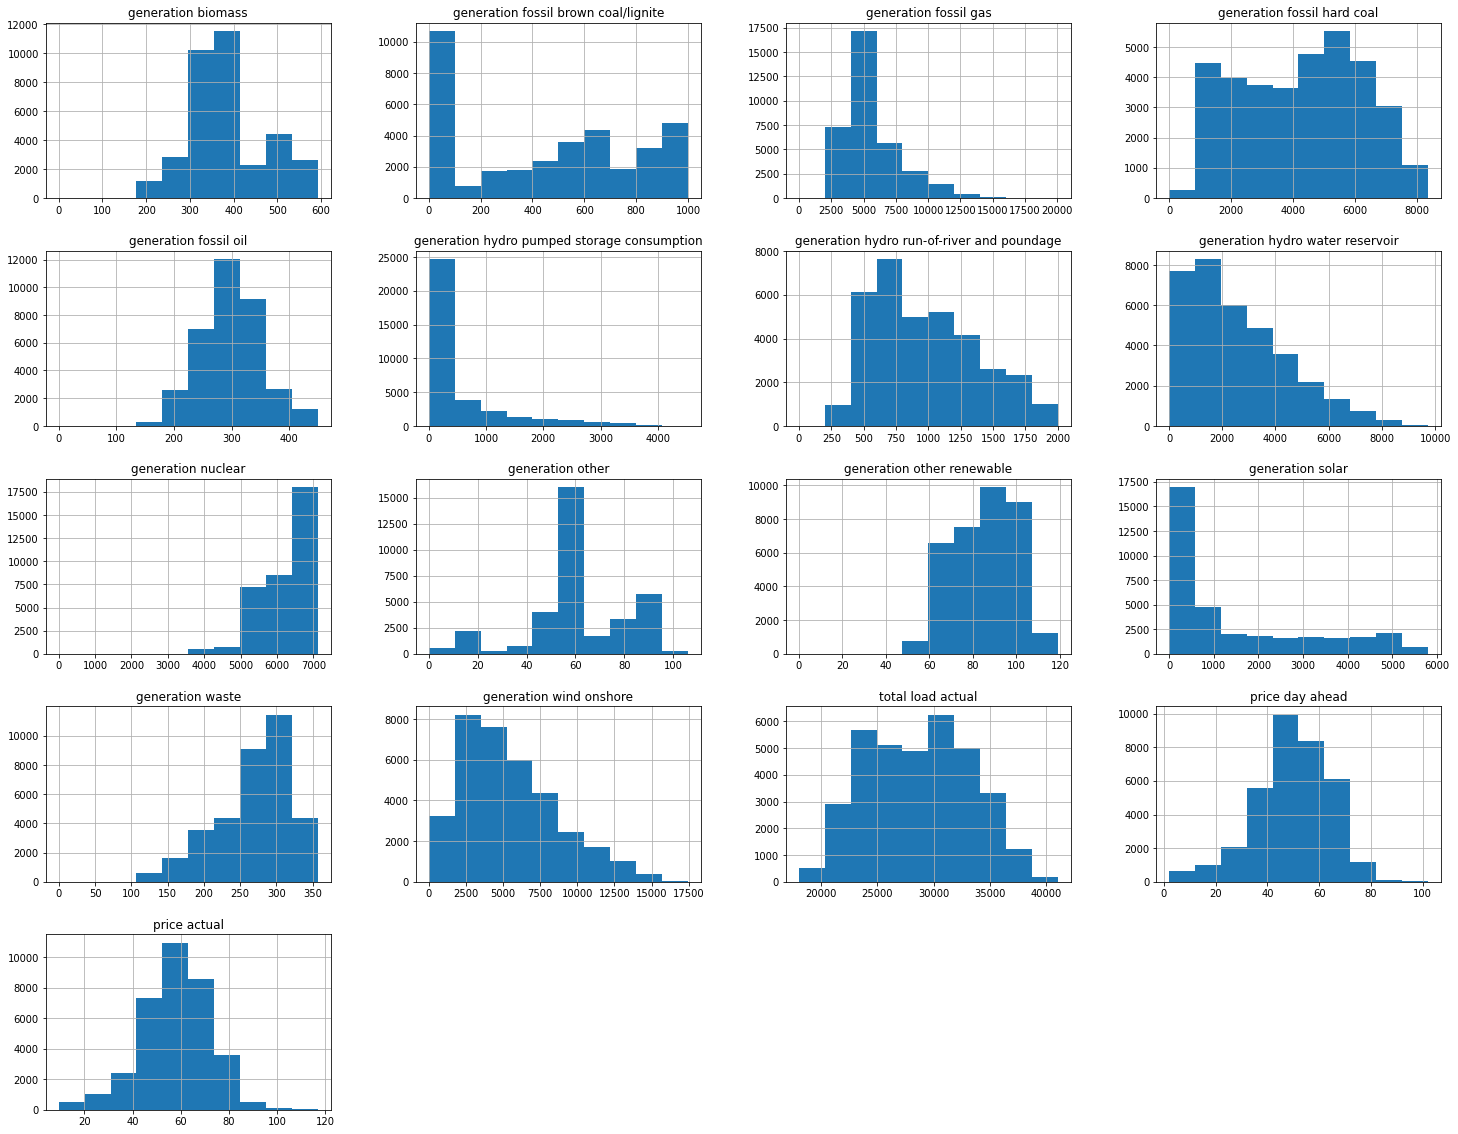

In [12]:
# Histogram
new_df.hist(figsize = (25,20))
plt.show()
#Farklı enerji kaynaklarının ortalama enerji üretimlerini veya ne sıklıkla ne kadar enerji ürettiklerini anlamak için.
# x-axis: tekrarlanma miktarı y-axis: üretilen enerji (MWh)

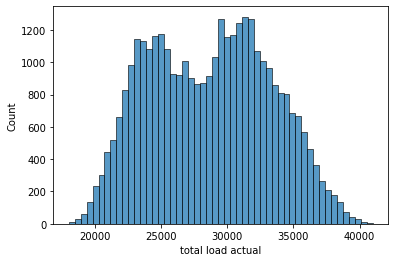

In [13]:
sns.histplot(df,x='total load actual');

In [14]:
#df["time"]
#datetime_series = pd.to_datetime(new_df["time"], utc = True)
#datetime_series.dt.hour
#new_df['hour'] = datetime_series.dt.hour
#new_df['hour']

new_df.columns = new_df.columns.str.replace(' ','_').str.replace('-','_')
copy_df.columns = copy_df.columns.str.replace(' ','_').str.replace('-','_')

In [15]:
#Tarih sütünunu gelecekteki kullanımlar için saat, gün, hafta, ay gibi dilimlere böldüm:
# Haftalık koy!
df_datesiz = new_df.select_dtypes(include = ["float64", "int64"])
datetime_series = pd.to_datetime(new_df['time'],utc=True)
new_df['date'] = datetime_series.dt.date
new_df['year'] = datetime_series.dt.year
new_df['hour'] = datetime_series.dt.hour
new_df['day'] = datetime_series.apply(lambda x: x.day_name())
new_df['month'] = datetime_series.apply(lambda x: x.month_name())
new_df['day_of_week'] = datetime_series.dt.dayofweek
date = new_df[["date","year","month","day","hour",'day_of_week']]

date


date  year     month        day  hour  day_of_week
0      2014-12-31  2014  December  Wednesday    23            2
1      2015-01-01  2015   January   Thursday     0            3
2      2015-01-01  2015   January   Thursday     1            3
3      2015-01-01  2015   January   Thursday     2            3
4      2015-01-01  2015   January   Thursday     3            3
...           ...   ...       ...        ...   ...          ...
35059  2018-12-31  2018  December     Monday    18            0
35060  2018-12-31  2018  December     Monday    19            0
35061  2018-12-31  2018  December     Monday    20            0
35062  2018-12-31  2018  December     Monday    21            0
35063  2018-12-31  2018  December     Monday    22            0

[35064 rows x 6 columns]

In [16]:
copy_df['time'] = pd.to_datetime(copy_df['time'],utc=True)
copy_df = copy_df.iloc[1:]
copy_df

time  generation_biomass  \
1     2015-01-01 00:00:00+00:00               449.0   
2     2015-01-01 01:00:00+00:00               448.0   
3     2015-01-01 02:00:00+00:00               438.0   
4     2015-01-01 03:00:00+00:00               428.0   
5     2015-01-01 04:00:00+00:00               410.0   
...                         ...                 ...   
35059 2018-12-31 18:00:00+00:00               297.0   
35060 2018-12-31 19:00:00+00:00               296.0   
35061 2018-12-31 20:00:00+00:00               292.0   
35062 2018-12-31 21:00:00+00:00               293.0   
35063 2018-12-31 22:00:00+00:00               290.0   

       generation_fossil_brown_coal/lignite  generation_fossil_gas  \
1                                     328.0                 5196.0   
2                                     323.0                 4857.0   
3                                     254.0                 4314.0   
4                                     187.0                 4130.0   
5                                     178.0                 4038.0   
...                                     ...                    ...   
35059                                   0.0                 7634.0   
35060                                   0.0                 7241.0   
35061                                   0.0                 7025.0   
35062                                   0.0                 6562.0   
35063                                   0.0                 6926.0   

       generation_fossil_hard_coal  generation_fossil_oil  \
1                           4755.0                  158.0   
2                           4581.0                  157.0   
3                           4131.0                  160.0   
4                           3840.0                  156.0   
5                           3590.0                  156.0   
...                            ...                    ...   
35059                       2628.0                  178.0   
35060                       2566.0                  174.0   
35061                       2422.0                  168.0   
35062                       2293.0                  163.0   
35063                       2166.0                  163.0   

       generation_hydro_pumped_storage_consumption  \
1                                        920.0       
2                                       1164.0       
3                                       1503.0       
4                                       1826.0       
5                                       2109.0       
...                                        ...       
35059                                      1.0       
35060                                      1.0       
35061                                     50.0       
35062                                    108.0       
35063                                    108.0       

       generation_hydro_run_of_river_and_poundage  \
1                                       1009.0      
2                                        973.0      
3                                        949.0      
4                                        953.0      
5                                        952.0      
...                                        ...      
35059                                   1135.0      
35060                                   1172.0      
35061                                   1148.0      
35062                                   1128.0      
35063                                   1069.0      

       generation_hydro_water_reservoir  generation_nuclear  ...  \
1                                1658.0              7096.0  ...   
2                                1371.0              7099.0  ...   
3                                 779.0              7098.0  ...   
4                                 720.0              7097.0  ...   
5                                 743.0              7098.0  ...   
...                                 ...                 ...  ...   
35059                         

In [17]:
son_df = pd.concat([date, df_datesiz], axis=1).copy()
son_df = son_df.iloc[1:]
son_df

date  year     month       day  hour  day_of_week  \
1      2015-01-01  2015   January  Thursday     0            3   
2      2015-01-01  2015   January  Thursday     1            3   
3      2015-01-01  2015   January  Thursday     2            3   
4      2015-01-01  2015   January  Thursday     3            3   
5      2015-01-01  2015   January  Thursday     4            3   
...           ...   ...       ...       ...   ...          ...   
35059  2018-12-31  2018  December    Monday    18            0   
35060  2018-12-31  2018  December    Monday    19            0   
35061  2018-12-31  2018  December    Monday    20            0   
35062  2018-12-31  2018  December    Monday    21            0   
35063  2018-12-31  2018  December    Monday    22            0   

       generation_biomass  generation_fossil_brown_coal/lignite  \
1                   449.0                                 328.0   
2                   448.0                                 323.0   
3                   438.0                                 254.0   
4                   428.0                                 187.0   
5                   410.0                                 178.0   
...                   ...                                   ...   
35059               297.0                                   0.0   
35060               296.0                                   0.0   
35061               292.0                                   0.0   
35062               293.0                                   0.0   
35063               290.0                                   0.0   

       generation_fossil_gas  generation_fossil_hard_coal  ...  \
1                     5196.0                       4755.0  ...   
2                     4857.0                       4581.0  ...   
3                     4314.0                       4131.0  ...   
4                     4130.0                       3840.0  ...   
5                     4038.0                       3590.0  ...   
...                      ...                          ...  ...   
35059                 7634.0                       2628.0  ...   
35060                 7241.0                       2566.0  ...   
35061                 7025.0                       2422.0  ...   
35062                 6562.0                       2293.0  ...   
35063                 6926.0                       2166.0  ...   

       generation_hydro_water_reservoir  generation_nuclear  generation_other  \
1                                1658.0              7096.0              43.0   
2                                1371.0              7099.0              43.0   
3                                 779.0              7098.0              43.0   
4                                 720.0              7097.0              43.0   
5                                 743.0              7098.0              43.0   
...                                 ...                 ...               ...   
35059                            4836.0              6073.0              63.0   
35060                            3931.0              6074.0              62.0   
35061                            2831.0              6076.0              61.0   
35062                            2068.0              6075.0              61.0   
35063                            1686.0              6075.0              61.0   

       generation_other_renewable  generation_solar  generation_waste  \
1                            71.0              50.0             195.0   
2                            73.0              50.0             196.0   
3                            75.0              50.0             191.0   
4                            74.0              42.0             189.0   
5                            74.0              34.0             188.0   
...                           ...               ...               ...   
35059                        95.0              85.0             277.0   
35060                        95.0              33.0             2

As we can see from above table, there is one outlier data from the 2014 year which in fact must not be in the data. Hence, I removed this data from the dataset as an outlier data.


In [18]:
#Dataya son olarak sezonsallığı da ekledim. Bu sayede sezonsallığın da sonuç üzerindeki etkisini daha iyi gözlemleyebiliriz.
son_df.loc[(son_df["month"] =="December") | (son_df["month"] =="January") | (son_df["month"] =="February") , "season"]= "winter"
son_df.loc[(son_df["month"] =="March")| (son_df["month"] =="April") | (son_df["month"] =="May") , "season"]= "spring"
son_df.loc[(son_df["month"] =="June") | (son_df["month"] =="July") |(son_df["month"] =="August"), "season"]= "summer"
son_df.loc[(son_df["month"] =="September") |(son_df["month"] =="October") | (son_df["month"] =="November"), "season"]= "autumn"

son_df.head(5)




date  year    month       day  hour  day_of_week  generation_biomass  \
1  2015-01-01  2015  January  Thursday     0            3               449.0   
2  2015-01-01  2015  January  Thursday     1            3               448.0   
3  2015-01-01  2015  January  Thursday     2            3               438.0   
4  2015-01-01  2015  January  Thursday     3            3               428.0   
5  2015-01-01  2015  January  Thursday     4            3               410.0   

   generation_fossil_brown_coal/lignite  generation_fossil_gas  \
1                                 328.0                 5196.0   
2                                 323.0                 4857.0   
3                                 254.0                 4314.0   
4                                 187.0                 4130.0   
5                                 178.0                 4038.0   

   generation_fossil_hard_coal  ...  generation_nuclear  generation_other  \
1                       4755.0  ...              7096.0              43.0   
2                       4581.0  ...              7099.0              43.0   
3                       4131.0  ...              7098.0              43.0   
4                       3840.0  ...              7097.0              43.0   
5                       3590.0  ...              7098.0              43.0   

   generation_other_renewable  generation_solar  generation_waste  \
1                        71.0              50.0             195.0   
2                        73.0              50.0             196.0   
3                        75.0              50.0             191.0   
4                        74.0              42.0             189.0   
5                        74.0              34.0             188.0   

   generation_wind_onshore  total_load_actual  price_day_ahead  price_actual  \
1                   5890.0            24382.0            48.10         64.92   
2                   5461.0            22734.0            47.33         64.48   
3                   5238.0            21286.0            42.27         59.32   
4                   4935.0            20264.0            38.41         56.04   
5                   4618.0            19905.0            35.72         53.63   

   season  
1  winter  
2  winter  
3  winter  
4  winter  
5  winter  

[5 rows x 24 columns]

In [19]:
import plotly.express as px

<AxesSubplot:xlabel='year,month', ylabel='Total load actual'>

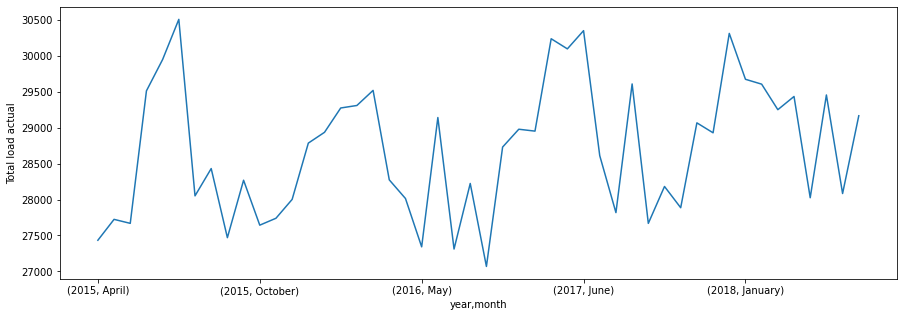

In [20]:
# Figure showing Price per total load
#fig = px.scatter(son_df,x=,
 #                y="total_load_actual",
  #               facet_col='season',
   #              opacity=0.1,
    #             title='Price Per KW Hour Compaired To Total Energy Genereated Per Season',
     #            animation_frame=son_df.year)
#fig

son_df[son_df.total_load_actual != 0].groupby([son_df.year,
                         son_df.month])["total_load_actual"].mean().plot(ylabel= 'Total load actual',figsize=(15,5))



Görüldüğü gibi Sezonsallık olsa da yıllara göre sezona göre değişkenlik gözüküyor, ama genelleme yapılacak olursa yaz ve kış aylarında elektrik tüketimi artıyor diyebiliriz.

In [21]:
son_df = son_df.drop(['price_day_ahead','price_actual'],axis = 1)
son_df['hols']= pd.Series(son_df.date).apply(lambda x: holidays.CountryHoliday('ES').get(x)).values
son_df['date']=pd.to_datetime(son_df['date'])
son_df['hols'] = son_df['hols'].astype('bool').astype('int')
hour_df = son_df

In [22]:
hour_df_fcst = hour_df[['date','hour']]
hour_df_fcst = hour_df_fcst.join(df['total load forecast'])
hour_df_fcst

date  hour  total load forecast
1     2015-01-01     0              24934.0
2     2015-01-01     1              23515.0
3     2015-01-01     2              22642.0
4     2015-01-01     3              21785.0
5     2015-01-01     4              21441.0
...          ...   ...                  ...
35059 2018-12-31    18              30619.0
35060 2018-12-31    19              29932.0
35061 2018-12-31    20              27903.0
35062 2018-12-31    21              25450.0
35063 2018-12-31    22              24424.0

[35063 rows x 3 columns]

In [23]:
daily_df = son_df.groupby(['date','year','month','day','season','day_of_week','hols'])['total_load_actual'].sum().reset_index()
daily_df

date  year     month       day  season  day_of_week  hols  \
0    2015-01-01  2015   January  Thursday  winter            3     1   
1    2015-01-02  2015   January    Friday  winter            4     0   
2    2015-01-03  2015   January  Saturday  winter            5     0   
3    2015-01-04  2015   January    Sunday  winter            6     0   
4    2015-01-05  2015   January    Monday  winter            0     0   
...         ...   ...       ...       ...     ...          ...   ...   
1456 2018-12-27  2018  December  Thursday  winter            3     0   
1457 2018-12-28  2018  December    Friday  winter            4     0   
1458 2018-12-29  2018  December  Saturday  winter            5     0   
1459 2018-12-30  2018  December    Sunday  winter            6     0   
1460 2018-12-31  2018  December    Monday  winter            0     0   

      total_load_actual  
0              575207.0  
1              652525.0  
2              602346.0  
3              650518.0  
4              543663.0  
...                 ...  
1456           685241.0  
1457           687868.0  
1458           638495.0  
1459           605724.0  
1460           597222.0  

[1461 rows x 8 columns]

In [24]:
train, test = son_df[son_df.year < 2018], son_df[son_df.year == 2018]
print(train.shape)
print(test.shape)

(26304, 23)
(8759, 23)


In [25]:
y_t = test['total_load_actual']
y_f = hour_df_fcst[hour_df_fcst.date.dt.year == 2018]['total load forecast']
a = mean_absolute_percentage_error(y_t,y_f)
print(a)

0.009256937463843023


# LSTM Model
For hourly data

In [25]:
categorical_features = ["year","month","day","hour","season"]
le = LabelEncoder()
labels = son_df[categorical_features].apply(le.fit_transform)

ls_df = pd.concat([labels, son_df[["hols", "total_load_actual"]]],axis=1)
ls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35063 entries, 1 to 35063
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               35063 non-null  int64  
 1   month              35063 non-null  int32  
 2   day                35063 non-null  int32  
 3   hour               35063 non-null  int64  
 4   season             35063 non-null  int32  
 5   hols               35063 non-null  int32  
 6   total_load_actual  35063 non-null  float64
dtypes: float64(1), int32(4), int64(2)
memory usage: 1.3 MB


In [26]:
ls_train, ls_test = ls_df[ls_df.year < 3], ls_df[ls_df.year == 3]
print(ls_train.shape)
print(ls_test.shape)

(26304, 7)
(8759, 7)


RobustScaler: Scale features using statistics that are robust to outliers.

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

In [27]:
#We scale the total load actual between -1.4 to 1.6
load_transformer = RobustScaler()
load_transformer = load_transformer.fit(ls_train[['total_load_actual']])
ls_train['total_load_actual'] = load_transformer.transform(ls_train[['total_load_actual']])

ls_test['total_load_actual'] = load_transformer.transform(ls_test[['total_load_actual']])

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_1816\565201995.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ls_train['total_load_actual'] = load_transformer.transform(ls_train[['total_load_actual']])
C:\Users\MONSTER\AppData\Local\Temp\ipykernel_1816\565201995.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ls_test['total_load_actual'] = load_transformer.transform(ls_test[['total_load_actual']])


In [28]:
max(ls_train['total_load_actual']) , min(ls_train.total_load_actual)

(1.6664844924169968, -1.4724689165186502)

In [29]:
(ls_train)

year  month  day  hour  season  hols  total_load_actual
1         0      4    4     0       3     1          -0.606094
2         0      4    4     1       3     1          -0.831261
3         0      4    4     2       3     1          -1.029102
4         0      4    4     3       3     1          -1.168739
5         0      4    4     4       3     1          -1.217789
...     ...    ...  ...   ...     ...   ...                ...
26300     2      2    3    19       3     0          -0.020768
26301     2      2    3    20       3     0          -0.212871
26302     2      2    3    21       3     0          -0.515781
26303     2      2    3    22       3     0          -0.702008
26304     2      2    3    23       3     0          -0.825113

[26304 rows x 7 columns]

In [30]:
#With this function, we rearrange the x and y values
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)


In [31]:
#Taking the previous 24 hours as our timesteps
time_steps = 24

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(ls_train, ls_train.total_load_actual, time_steps)
X_test, y_test = create_dataset(ls_test, ls_test.total_load_actual, time_steps)


print(X_train.shape, y_train.shape)

(26280, 24, 7) (26280,)


In [33]:
y_train

array([-0.53053696, -0.76567837, -0.85776745, ..., -0.51578084,
       -0.70200847, -0.82511272])

# Multistep LSTM Data Prep

In [30]:
ls_tr = ls_train.total_load_actual
ls_tst = ls_test.total_load_actual
print(ls_tr.shape, ls_tst.shape)

(26304,) (8759,)


In [31]:
ls_train

year  month  day  hour  season  hols  total_load_actual
1         0      4    4     0       3     1          -0.606094
2         0      4    4     1       3     1          -0.831261
3         0      4    4     2       3     1          -1.029102
4         0      4    4     3       3     1          -1.168739
5         0      4    4     4       3     1          -1.217789
...     ...    ...  ...   ...     ...   ...                ...
26300     2      2    3    19       3     0          -0.020768
26301     2      2    3    20       3     0          -0.212871
26302     2      2    3    21       3     0          -0.515781
26303     2      2    3    22       3     0          -0.702008
26304     2      2    3    23       3     0          -0.825113

[26304 rows x 7 columns]

In [32]:
def windowed_dataset(series, window_size, forecast_horizon, batch_size=None, n_shuffles=None):
  # convert np.array into tensor
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + forecast_horizon, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + forecast_horizon))
  # shuffle data
  if n_shuffles:
    dataset = dataset.shuffle(n_shuffles)
  dataset = dataset.map(lambda window: (window[:-forecast_horizon], window[-forecast_horizon:]))
  if batch_size:
    dataset = dataset.batch(batch_size).prefetch(1)
  return dataset



window_size = 48
forecast_horizon = 4


train = windowed_dataset(ls_tr,
                        window_size = window_size, forecast_horizon = forecast_horizon,
                        batch_size = None, n_shuffles = 50)
test = windowed_dataset(ls_tst,
                        window_size = window_size, forecast_horizon = forecast_horizon,
                        batch_size = None, n_shuffles = None)
xtr,ytr = [],[]
for x,y in train:
  xtr.append(list(x.numpy()))
  ytr.append(list(y.numpy()))

xtst,ytst = [],[]
for x, y in test:
  xtst.append(list(x.numpy()))
  ytst.append(list(y.numpy()))

xtr = np.array(xtr)
ytr = np.array(ytr)
xtst = np.array(xtst)
ytst = np.array(ytst)

print("xtr: ", xtr.shape)
print("ytr: ", ytr.shape)
print("xtst: ", xtst.shape)
print("ytst: ", ytst.shape)

xtr:  (26253, 48)
ytr:  (26253, 4)
xtst:  (8708, 48)
ytst:  (8708, 4)


In [33]:
def multi_target_output(data):
  y1,y2,y3,y4 = [],[],[],[]
  for y in data:
    y1.append(y[0])
    y2.append(y[1])
    y3.append(y[2])
    y4.append(y[3])
  return (np.array(y1),np.array(y2),np.array(y3),np.array(y4))


y_tr = multi_target_output(ytr)
y_tst = multi_target_output(ytst)

print("y_tr: ",np.shape(y_tr))
print("y_tst: ",np.shape(y_tst))

y_tr:  (4, 26253)
y_tst:  (4, 8708)


In [34]:
def build_model_with_functional(input_shape, output_shape, features_shape = None, show=False):

    # set random state
    tf.random.set_seed(5252)
    
    if features_shape:
        input_layer = tf.keras.Input(shape=(input_shape,features_shape))
        #lstm_1 = tf.keras.layers.LSTM(128, activation='sigmoid', return_sequences=True)(input_layer)
        #lstm_2 = tf.keras.layers.LSTM(64, activation='sigmoid', return_sequences=False)(lstm_1)
        #last_layer = tf.keras.layers.Dropout(rate=0.2)(lstm_2)
        last_layer = tf.keras.layers.Bidirectional(keras.layers.LSTM(units = 128))(input_layer)
        print(True)
        # y1 forecast
        y1_output = tf.keras.layers.Dense(units=1, name='y1_output')(last_layer)
        # y2 forecast
        y2_output = tf.keras.layers.Dense(units=1, name='y2_output')(last_layer)
        # y3 forecast
        y3_output = tf.keras.layers.Dense(units=1, name='y3_output')(last_layer)
        # y4 forecast
        y4_output = tf.keras.layers.Dense(units=1, name='y4_output')(last_layer)
    else:
        input_layer = tf.keras.Input(shape=(input_shape,))
        
        # Input layers

        first_dense = tf.keras.layers.Dense(64, activation=tf.nn.relu)(input_layer)
        second_dense = tf.keras.layers.Dense(64, activation=tf.nn.relu)(first_dense)
        third_dense = tf.keras.layers.Dense(32, activation=tf.nn.relu)(second_dense)
        
        # single output
        #output_layer = tf.keras.layers.Dense(output_shape)(first_dense)
        #func_model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

        # y1 forecast
        y1_output = tf.keras.layers.Dense(units=1, name='y1_output')(first_dense)
        # y2 forecast
        y2_output = tf.keras.layers.Dense(units=1, name='y2_output')(first_dense)
        # y3 forecast
        y3_output = tf.keras.layers.Dense(units=1, name='y3_output')(first_dense)
        # y4 forecast
        y4_output = tf.keras.layers.Dense(units=1, name='y4_output')(first_dense)

    # define model
    func_model = tf.keras.models.Model(inputs=input_layer, outputs=[y1_output,
                                                                    y2_output,
                                                                    y3_output,
                                                                    y4_output
                                                                   ])
    
    if show:
        print(func_model.summary())

    
    return func_model

In [35]:
# loss object
from tensorflow.keras.losses import Loss

class HuberLoss(Loss):
  
    # initialize instance attributes
    def __init__(self, threshold=1):
        super().__init__()
        self.threshold = threshold

    # compute loss
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) <= self.threshold
        small_error_loss = tf.square(error) / 2
        big_error_loss = self.threshold * (tf.abs(error) - (0.5 * self.threshold))
        return tf.where(is_small_error, small_error_loss, big_error_loss)

# Only outputs

273/273 [==============================] - 0s 793us/step
** MSE **
bayes mse:  [0.402  0.4019 0.4019 0.402 ]
mse:        [0.0066 0.0115 0.0177 0.0253] 

** MAE **
bayes mae:  [0.5419 0.5418 0.5418 0.5419]
mae:        [0.0553 0.0757 0.0938 0.1123]
--- 2.5310073057810465 minutes ---


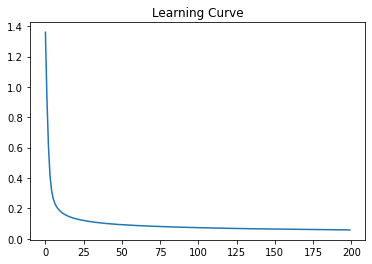

In [41]:
start_time = time.time()

model = build_model_with_functional(window_size, forecast_horizon)

# configure, train, and evaluate the model
huber_threshold = 0.1
model.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-5),
              loss={'y1_output': 'mean_squared_error',#HuberLoss(huber_threshold), 
                    'y2_output': 'mean_squared_error',#HuberLoss(huber_threshold), 
                    'y3_output': 'mean_squared_error',#HuberLoss(huber_threshold), 
                    'y4_output': 'mean_squared_error',})#HuberLoss(huber_threshold)})

history = model.fit(xtr, y_tr, 
                    epochs=200, 
                    callbacks=tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=1e-5,patience=10), 
                    verbose=0)

y_preds = model.predict(xtst)
predictions = np.column_stack((y_preds[0],
                               y_preds[1],
                               y_preds[2],
                               y_preds[3]))
predictions = predictions.round(2)
model.save('Model_multisteps_without_features' + '.h5')
# model performance
error = ytst - predictions
bayes_error = ytst-ytr.mean(axis=0)

print('** MSE **')
print("bayes mse: ",(bayes_error**2).mean(axis=0).round(4))
print('mse:       ', np.mean(error**2,axis=0).round(4),'\n')

print('** MAE **')
print("bayes mae: ",abs(bayes_error).mean(axis=0).round(4))
print('mae:       ', np.mean(abs(error),axis=0).round(4))

plt.plot(history.history["loss"])
plt.title('Learning Curve');
print("--- %s minutes ---" % float((time.time() - start_time)/60))

In [37]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           3136        ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 64)           4160        ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 32)           2080        ['dense_1[0][0]']                
                                                                                              

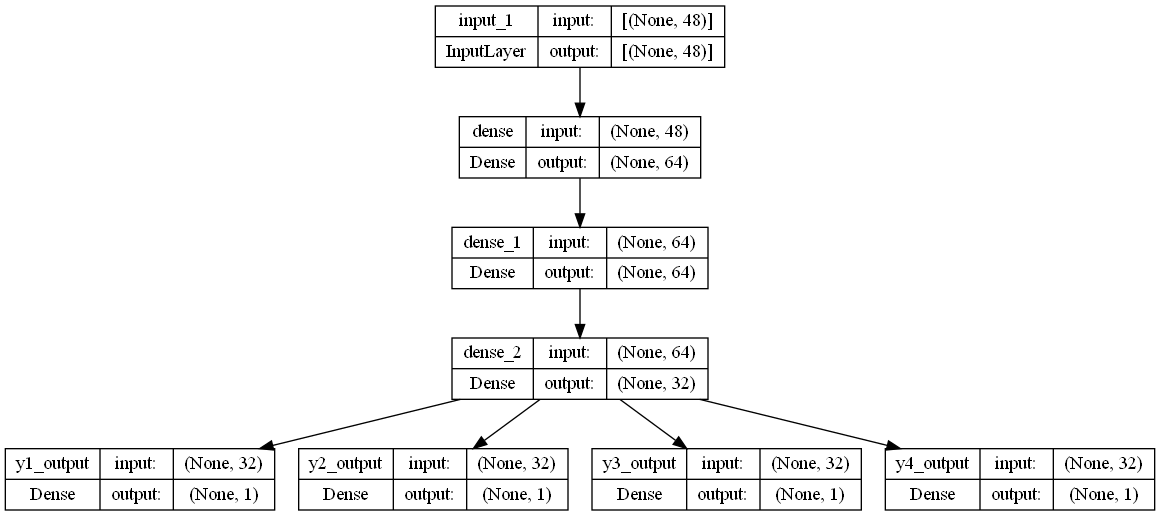

In [40]:

tf.keras.utils.plot_model(model, to_file = 'dense_model.png',show_shapes = True)

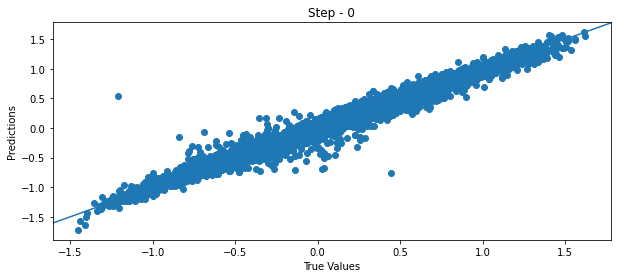

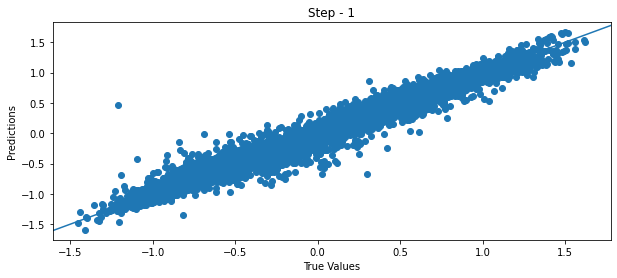

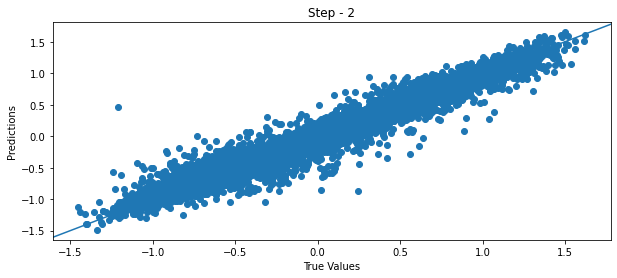

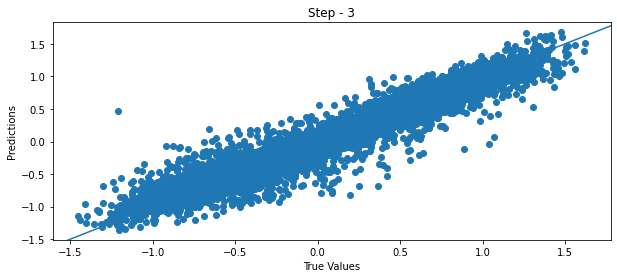

In [49]:
for i in range(4):
  t = 'Step - ' + str(i)

  plt.figure(figsize=(10,4))
  plt.scatter(y_tst[i], y_preds[i])
  plt.title(t)
  plt.xlabel('True Values')
  plt.ylabel('Predictions')
  plt.xlim(plt.xlim())
  plt.ylim(plt.ylim())
  plt.plot([-100, 500], [-100, 500])
  plt.show()

In [50]:
len(y_tst)

4

In [51]:
y_tst[0].reshape(-1,1).shape

(8708, 1)

In [52]:
predictions.shape

(8708, 4)

In [53]:
y_preds[1].shape

(8708, 1)

In [54]:
#Results list for the time steps 
results_list = []
for i in range(forecast_horizon):
    y_test_inv = load_transformer.inverse_transform(y_tst[i].reshape(-1, 1))
    y_pred_inv = load_transformer.inverse_transform(y_preds[i])
    r2 = r2_score(y_tst[i], y_preds[i])
    mape = mean_absolute_percentage_error(y_test_inv.flatten(), y_pred_inv.flatten())
    mae = mean_absolute_error(y_test_inv.flatten(), y_pred_inv.flatten())
    print('R2 Score for MultiStep NN Model for step',i,'=',r2)
    print('MAPE Score for MultiStep NN Model for step',i,'=', mape)
    print('MAE Score for MultiStep NN Model for step',i,'=', mae)
    results_list.append(['For forecast horizon',i,'results',r2,
                         mean_absolute_percentage_error(y_test_inv.flatten(), 
                                                        y_pred_inv.flatten()),
                         mean_absolute_error(y_test_inv.flatten(), y_pred_inv.flatten())])

R2 Score for MultiStep NN Model for step 0 = 0.9832722186160836
MAPE Score for MultiStep NN Model for step 0 = 0.014149068705782737
MAE Score for MultiStep NN Model for step 0 = 403.63576237367937
R2 Score for MultiStep NN Model for step 1 = 0.9705451423685469
MAPE Score for MultiStep NN Model for step 1 = 0.019683903414473465
MAE Score for MultiStep NN Model for step 1 = 558.1006552433826
R2 Score for MultiStep NN Model for step 2 = 0.9556914431223957
MAPE Score for MultiStep NN Model for step 2 = 0.024272053182705602
MAE Score for MultiStep NN Model for step 2 = 684.8037423382235
R2 Score for MultiStep NN Model for step 3 = 0.9359006360601662
MAPE Score for MultiStep NN Model for step 3 = 0.02950746900901895
MAE Score for MultiStep NN Model for step 3 = 828.4293402977147


In [214]:
results_list

[['For forecast horizon',
  0,
  'results',
  0.9855967143989831,
  0.0125897392510788,
  357.8587164819706],
 ['For forecast horizon',
  1,
  'results',
  0.9697514523881026,
  0.019641394914731734,
  555.2717091144638],
 ['For forecast horizon',
  2,
  'results',
  0.9514290378902861,
  0.025489732452670676,
  716.5816867392053],
 ['For forecast horizon',
  3,
  'results',
  0.9290550246087992,
  0.03095481209324806,
  866.6537888561523]]

From the results above, it is clear that this multi-layer neural network model predicts the first step best and the performance decreases gradually. However, we can compare the results found here with other time_series methods which may perform more poorly going through more steps in the future.

In [215]:
y_test_inv = load_transformer.inverse_transform(y_tst[0].reshape(-1, 1))
y_pred_inv = load_transformer.inverse_transform(y_preds[0])

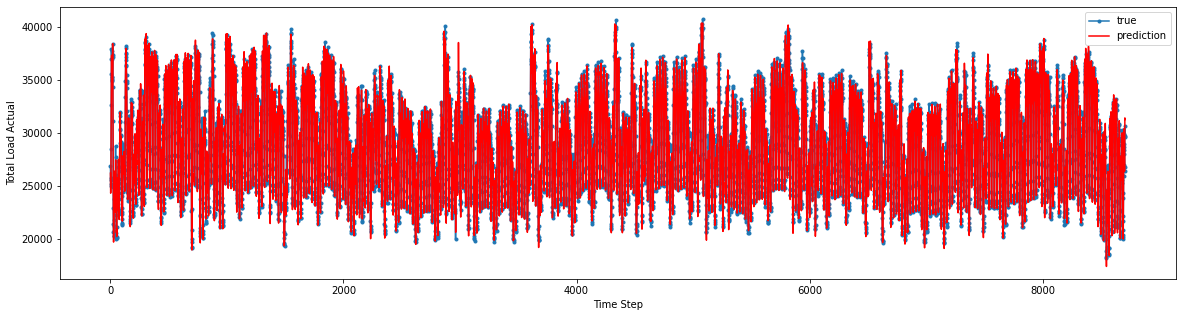

In [216]:
plt.figure(figsize = (20,5))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Total Load Actual')
plt.xlabel('Time Step')
plt.legend()

plt.show();

# Multi-feature

In [62]:
train2 = windowed_dataset(ls_train,
                        window_size = window_size, forecast_horizon = forecast_horizon,
                        batch_size = None, n_shuffles = 50)
test2 = windowed_dataset(ls_test,
                        window_size = window_size, forecast_horizon = forecast_horizon,
                        batch_size = None, n_shuffles = None)
xtr2,ytr2 = [],[]
for x,y in train2:
  xtr2.append(list(x.numpy()))
  ytr2.append(list(y.numpy()))

xtst2,ytst2 = [],[]
for x, y in test2:
  xtst2.append(list(x.numpy()))
  ytst2.append(list(y.numpy()))

xtr2 = np.array(xtr2)
ytr2 = np.array(ytr2)
xtst2 = np.array(xtst2)
ytst2 = np.array(ytst2)

print("xtr2: ", xtr2.shape)
print("ytr2: ", ytr2.shape)
print("xtst2: ", xtst2.shape)
print("ytst2: ", ytst2.shape)

xtr2:  (26253, 48, 7)
ytr2:  (26253, 4, 7)
xtst2:  (8708, 48, 7)
ytst2:  (8708, 4, 7)


In [63]:
ytr2 = ytr2[:,:,-1]
ytst2 = ytst2[:,:,-1]
print(ytr2.shape , ytst2.shape)

new_ytr = multi_target_output(ytr2)
new_ytst = multi_target_output(ytst2)

print("new_ytr: ",np.shape(new_ytr))
print("new_ytst: ",np.shape(new_ytst))

(26253, 4) (8708, 4)
new_ytr:  (4, 26253)
new_ytst:  (4, 8708)


In [113]:
new_ytst[0].shape

(8708,)

In [77]:
start_time = time.time()
model_multi_feat = build_model_with_functional(window_size, forecast_horizon, xtr2.shape[2])

# configure, train, and evaluate the model
huber_threshold = 0.1
model_multi_feat.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-5),
              loss={'y1_output': 'mean_squared_error',#HuberLoss(huber_threshold), 
                    'y2_output': 'mean_squared_error',#HuberLoss(huber_threshold), 
                    'y3_output': 'mean_squared_error',#HuberLoss(huber_threshold), 
                    'y4_output': 'mean_squared_error',})#HuberLoss(huber_threshold)
                   
#
history = model_multi_feat.fit(xtr2, new_ytr, 
                    epochs=100, 
                    callbacks=tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=1e-5,patience=10), 
                    verbose=2)
model_multi_feat.save('Model_multistepswithfeatures' + '.h5')
y_preds2 = model_multi_feat.predict(xtst2)
predictions2 = np.column_stack((y_preds2[0],
                               y_preds2[1],
                               y_preds2[2],
                               y_preds2[3]
                               ))
predictions2 = predictions2.round(2)
print("--- %s minutes ---" % float((time.time() - start_time)/60))

True
Epoch 1/100
821/821 - 27s - loss: 1.4704 - y1_output_loss: 0.3208 - y2_output_loss: 0.2896 - y3_output_loss: 0.5109 - y4_output_loss: 0.3491 - 27s/epoch - 33ms/step
Epoch 2/100
821/821 - 24s - loss: 0.7913 - y1_output_loss: 0.1936 - y2_output_loss: 0.1893 - y3_output_loss: 0.2065 - y4_output_loss: 0.2019 - 24s/epoch - 30ms/step
Epoch 3/100
821/821 - 24s - loss: 0.6780 - y1_output_loss: 0.1612 - y2_output_loss: 0.1659 - y3_output_loss: 0.1773 - y4_output_loss: 0.1736 - 24s/epoch - 29ms/step
Epoch 4/100
821/821 - 24s - loss: 0.6043 - y1_output_loss: 0.1403 - y2_output_loss: 0.1481 - y3_output_loss: 0.1603 - y4_output_loss: 0.1556 - 24s/epoch - 29ms/step
Epoch 5/100
821/821 - 24s - loss: 0.5232 - y1_output_loss: 0.1182 - y2_output_loss: 0.1268 - y3_output_loss: 0.1417 - y4_output_loss: 0.1366 - 24s/epoch - 29ms/step
Epoch 6/100
821/821 - 25s - loss: 0.4343 - y1_output_loss: 0.0944 - y2_output_loss: 0.1028 - y3_output_loss: 0.1204 - y4_output_loss: 0.1167 - 25s/epoch - 30ms/step
Epoch

Epoch 51/100
821/821 - 25s - loss: 0.1174 - y1_output_loss: 0.0167 - y2_output_loss: 0.0267 - y3_output_loss: 0.0338 - y4_output_loss: 0.0403 - 25s/epoch - 30ms/step
Epoch 52/100
821/821 - 25s - loss: 0.1165 - y1_output_loss: 0.0165 - y2_output_loss: 0.0264 - y3_output_loss: 0.0336 - y4_output_loss: 0.0401 - 25s/epoch - 30ms/step
Epoch 53/100
821/821 - 25s - loss: 0.1157 - y1_output_loss: 0.0163 - y2_output_loss: 0.0263 - y3_output_loss: 0.0333 - y4_output_loss: 0.0398 - 25s/epoch - 30ms/step
Epoch 54/100
821/821 - 25s - loss: 0.1147 - y1_output_loss: 0.0161 - y2_output_loss: 0.0260 - y3_output_loss: 0.0331 - y4_output_loss: 0.0395 - 25s/epoch - 31ms/step
Epoch 55/100
821/821 - 25s - loss: 0.1143 - y1_output_loss: 0.0159 - y2_output_loss: 0.0260 - y3_output_loss: 0.0330 - y4_output_loss: 0.0395 - 25s/epoch - 31ms/step
Epoch 56/100
821/821 - 25s - loss: 0.1135 - y1_output_loss: 0.0157 - y2_output_loss: 0.0257 - y3_output_loss: 0.0328 - y4_output_loss: 0.0392 - 25s/epoch - 31ms/step
Epoc

273/273 [==============================] - 4s 13ms/step
--- 42.02977943817775 minutes ---


In [84]:
model_multi_feat.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 48, 7)]      0           []                               
                                                                                                  
 bidirectional_4 (Bidirectional  (None, 256)         139264      ['input_5[0][0]']                
 )                                                                                                
                                                                                                  
 y1_output (Dense)              (None, 1)            257         ['bidirectional_4[0][0]']        
                                                                                                  
 y2_output (Dense)              (None, 1)            257         ['bidirectional_4[0][0]']  

In [85]:
y_preds2[0].shape

(8708, 1)

In [86]:
predictions2.shape

(8708, 4)

In [87]:
predictions2.shape

(8708, 4)

** MSE **
bayes mse:  [0.402  0.4019 0.4019 0.402 ]
mse:        [0.0127 0.0255 0.035  0.0445] 

** MAE **
bayes mae:  [0.5419 0.5418 0.5418 0.5419]
mae:        [0.0804 0.1148 0.1354 0.1542]


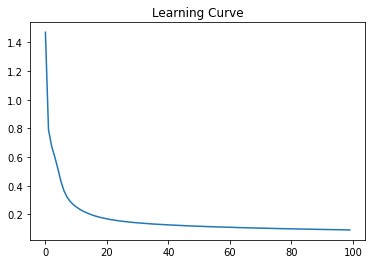

In [88]:
# model performance
error = ytst2 - predictions2
bayes_error = ytst2-ytr2.mean(axis=0)

print('** MSE **')
print("bayes mse: ",(bayes_error**2).mean(axis=0).round(4))
print('mse:       ', np.mean(error**2,axis=0).round(4),'\n')

print('** MAE **')
print("bayes mae: ",abs(bayes_error).mean(axis=0).round(4))
print('mae:       ', np.mean(abs(error),axis=0).round(4))

plt.plot(history.history["loss"])
plt.title('Learning Curve');


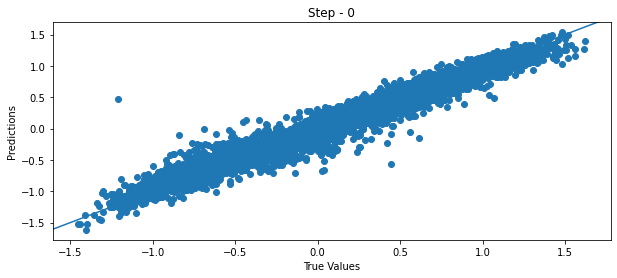

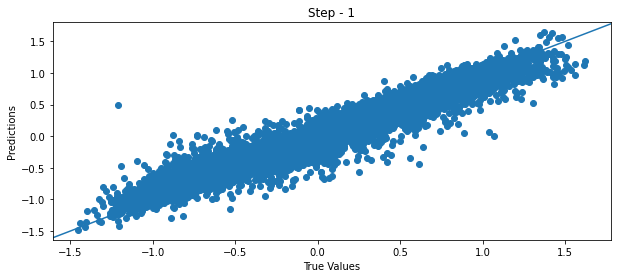

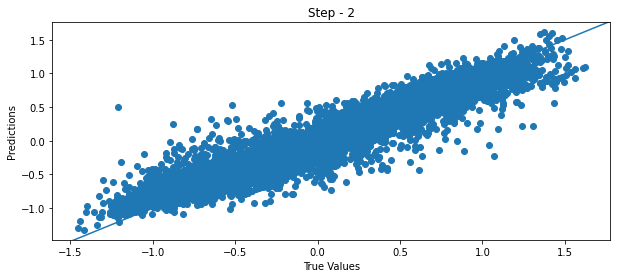

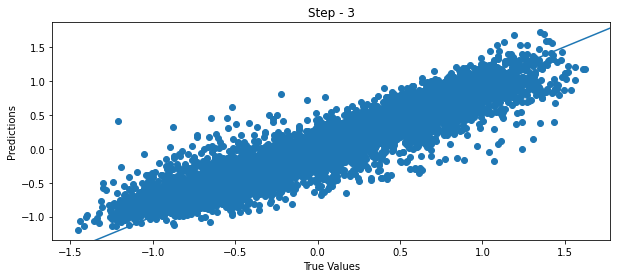

In [89]:
for i in range(4):
  t = 'Step - ' + str(i)

  plt.figure(figsize=(10,4))
  plt.scatter(new_ytst[i], y_preds2[i])
  plt.title(t)
  plt.xlabel('True Values')
  plt.ylabel('Predictions')
  plt.xlim(plt.xlim())
  plt.ylim(plt.ylim())
  plt.plot([-100, 500], [-100, 500])
  plt.show()

In [59]:
new_ytst[0].shape

(8708,)

In [90]:
#Results list for the time steps 
results_list_2 = []
for i in range(forecast_horizon):
    y_test_inv = load_transformer.inverse_transform(new_ytst[i].reshape(-1, 1))
    y_pred_inv = load_transformer.inverse_transform(y_preds2[i])
    r2 = r2_score(new_ytst[i], y_preds2[i])
    mape = mean_absolute_percentage_error(y_test_inv.flatten(), y_pred_inv.flatten())
    mae = mean_absolute_error(y_test_inv.flatten(), y_pred_inv.flatten())
    print('R2 Score for MultiStep NN Model for step',i,'=',r2)
    print('MAPE Score for MultiStep NN Model for step',i,'=', mape)
    print('MAE Score for MultiStep NN Model for step',i,'=', mae)
    results_list_2.append(['For forecast horizon',i,'results',r2,
                         mean_absolute_percentage_error(y_test_inv.flatten(),
                                                        y_pred_inv.flatten()),
                           mean_absolute_error(y_test_inv.flatten(), y_pred_inv.flatten())])

R2 Score for MultiStep NN Model for step 0 = 0.9681467116349721
MAPE Score for MultiStep NN Model for step 0 = 0.02062342625535349
MAE Score for MultiStep NN Model for step 0 = 588.0722880540882
R2 Score for MultiStep NN Model for step 1 = 0.9359587502285418
MAPE Score for MultiStep NN Model for step 1 = 0.029415310273940388
MAE Score for MultiStep NN Model for step 1 = 840.0769398469798
R2 Score for MultiStep NN Model for step 2 = 0.9119665623562617
MAPE Score for MultiStep NN Model for step 2 = 0.03489996290178997
MAE Score for MultiStep NN Model for step 2 = 990.6600660850654
R2 Score for MultiStep NN Model for step 3 = 0.8881600070809794
MAPE Score for MultiStep NN Model for step 3 = 0.03983710715018242
MAE Score for MultiStep NN Model for step 3 = 1128.5457378452286


In [61]:
y_test_inv = load_transformer.inverse_transform(new_ytst[0].reshape(-1, 1))
y_pred_inv = load_transformer.inverse_transform(y_preds2)
r2 = r2_score(new_ytst[0], y_preds2)
mape = mean_absolute_percentage_error(y_test_inv.flatten(), y_pred_inv.flatten())
mae = mean_absolute_error(y_test_inv.flatten(), y_pred_inv.flatten())
print('R2 Score for MultiStep NN Model for step',i,'=',r2)
print('MAPE Score for MultiStep NN Model for step',i,'=', mape)
print('MAE Score for MultiStep NN Model for step',i,'=', mae)

R2 Score for MultiStep NN Model for step 0 = 0.9792895914047803
MAPE Score for MultiStep NN Model for step 0 = 0.01578437659400482
MAE Score for MultiStep NN Model for step 0 = 450.90938558652965


# ---

In [43]:
X_train.shape[1]

24

In [254]:
def lstm_model(hp):
    model = keras.Sequential()
    hp_units = hp.Int('units', min_value=32, max_value=288, step=32)
    model.add(
      keras.layers.Bidirectional(
        keras.layers.LSTM(
          units = hp_units,
          input_shape=(X_train.shape[1], X_train.shape[2])
        )
      )
    )
    model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

#  LSTM Hourly with 2 Normal LSTM Layers

In [63]:
def lstm_hourly_2layer():
    model = keras.Sequential()
    model.add(keras.layers.LSTM(256, activation='sigmoid', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(keras.layers.LSTM(64, activation='sigmoid', return_sequences=False))
    #model.add(
    #  keras.layers.Bidirectional(
    #    keras.layers.LSTM(
    #      units = 128,
    #      input_shape=(X_train.shape[1], X_train.shape[2])
    #    )
    #  )
    #)
    #
    model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.Dense(units=1))
    model.compile(loss='mse', optimizer='adam')
    return model

In [64]:
start_time = time.time()
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model_hourly_reg = lstm_hourly_2layer()
history = model_hourly_reg.fit(
    X_train, y_train, 
    epochs=200, 
    batch_size=30, 
    validation_split=0.2,
    shuffle=False,
    verbose = 1,
    callbacks = [stop_early]
)
print("--- %s minutes ---" % float((time.time() - start_time)/60))

Epoch 1/200
701/701 [==============================] - 25s 34ms/step - loss: 0.1850 - val_loss: 0.0296
Epoch 2/200
701/701 [==============================] - 25s 36ms/step - loss: 0.0330 - val_loss: 0.0270
Epoch 3/200
701/701 [==============================] - 25s 36ms/step - loss: 0.0210 - val_loss: 0.0146
Epoch 4/200
701/701 [==============================] - 25s 36ms/step - loss: 0.0172 - val_loss: 0.0132
Epoch 5/200
701/701 [==============================] - 25s 35ms/step - loss: 0.0161 - val_loss: 0.0148
Epoch 6/200
701/701 [==============================] - 25s 36ms/step - loss: 0.0145 - val_loss: 0.0121
Epoch 7/200
701/701 [==============================] - 25s 36ms/step - loss: 0.0143 - val_loss: 0.0103
Epoch 8/200
701/701 [==============================] - 25s 36ms/step - loss: 0.0137 - val_loss: 0.0097
Epoch 9/200
701/701 [==============================] - 25s 36ms/step - loss: 0.0132 - val_loss: 0.0092
Epoch 10/200
701/701 [==============================] - 25s 36ms/step - l

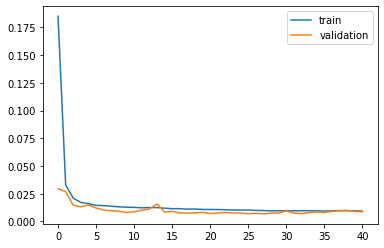

In [66]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend();

In [67]:
y_pred = model_hourly_reg.predict(X_test)

273/273 [==============================] - 4s 15ms/step


In [68]:
y_train_inv = load_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = load_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = load_transformer.inverse_transform(y_pred)

In [69]:
print('R2 Score for LSTM Model =',r2_score(y_test, y_pred))
print('MAPE Score for LSTM Model=', mean_absolute_percentage_error(y_test_inv.flatten(), y_pred_inv.flatten()))
print('MAE Score for LSTM Model=', mean_absolute_error(y_test_inv.flatten(), y_pred_inv.flatten()))

R2 Score for LSTM Model = 0.9687316313655551
MAPE Score for LSTM Model= 0.020555902778683077
MAE Score for LSTM Model= 591.5697110224671


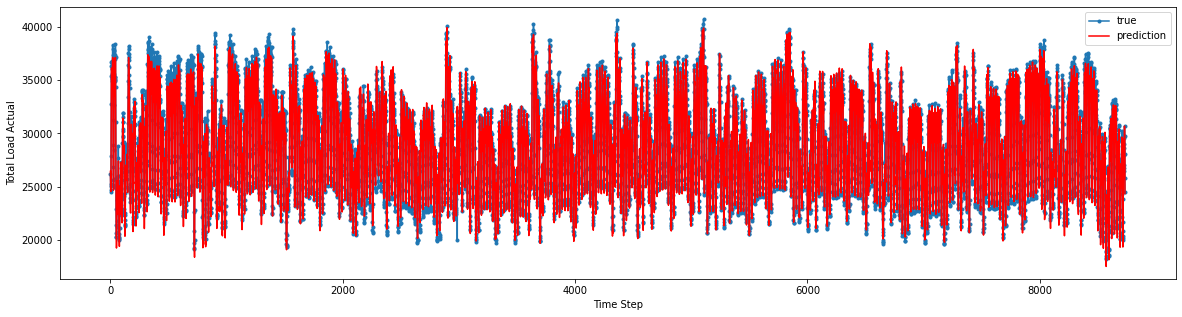

In [70]:
plt.figure(figsize = (20,5))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Total Load Actual')
plt.xlabel('Time Step')
plt.legend()

plt.show();

# ---

In [255]:
#Keras tuner ile lstm modelindeki hyperparametreleri tunelayabiliyoruz
import keras_tuner as kt

tuner = kt.RandomSearch(
    lstm_model,
    objective='val_loss',
    max_trials=5,
    overwrite=True)

In [256]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)
tuner.search(X_train, y_train, epochs=300, validation_data=(X_test, y_test),callbacks=[stop_early])
best_model = tuner.get_best_models()[0]

Trial 5 Complete [00h 02m 00s]
val_loss: 0.3465988039970398

Best val_loss So Far: 0.34263744950294495
Total elapsed time: 00h 10m 40s
INFO:tensorflow:Oracle triggered exit


In [248]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
units: 256
Score: 0.32816073298454285
Trial summary
Hyperparameters:
units: 224
Score: 0.3454802334308624
Trial summary
Hyperparameters:
units: 192
Score: 0.3509010076522827
Trial summary
Hyperparameters:
units: 160
Score: 0.35285845398902893
Trial summary
Hyperparameters:
units: 64
Score: 0.3581587076187134


In [36]:
best_hp = tuner.get_best_hyperparameters(2)
#En iyi sonucu veren hyperparametrelerle yeniden modeli eğittik
model = lstm_model(best_hp[0])
# Fit with the entire dataset.

history = model.fit(x=X_train, y=y_train, epochs=90,validation_split=0.2, callbacks = [stop_early])
val_loss_per_epoch = history.history['val_loss']
best_epoch = val_loss_per_epoch.index(min(val_loss_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/90
657/657 [==============================] - 51s 74ms/step - loss: 0.0730 - val_loss: 0.0146
Epoch 2/90
657/657 [==============================] - 63s 95ms/step - loss: 0.0179 - val_loss: 0.0170
Epoch 3/90
657/657 [==============================] - 62s 95ms/step - loss: 0.0124 - val_loss: 0.0083
Epoch 4/90
657/657 [==============================] - 64s 97ms/step - loss: 0.0107 - val_loss: 0.0067
Epoch 5/90
657/657 [==============================] - 65s 99ms/step - loss: 0.0098 - val_loss: 0.0086
Epoch 6/90
657/657 [==============================] - 65s 99ms/step - loss: 0.0092 - val_loss: 0.0099
Epoch 7/90
657/657 [==============================] - 65s 99ms/step - loss: 0.0085 - val_loss: 0.0056
Epoch 8/90
657/657 [==============================] - 63s 96ms/step - loss: 0.0081 - val_loss: 0.0062
Epoch 9/90
657/657 [==============================] - 63s 96ms/step - loss: 0.0079 - val_loss: 0.0062
Epoch 10/90
657/657 [==============================] - 63s 96ms/step - loss: 0.007

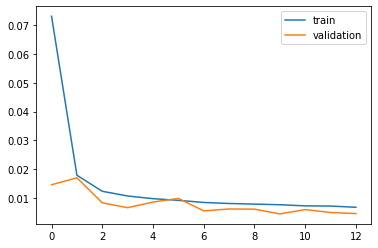

In [37]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend();

In [38]:
y_pred = model.predict(X_test)

273/273 [==============================] - 5s 17ms/step


In [39]:
y_train_inv = load_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = load_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = load_transformer.inverse_transform(y_pred)

In [40]:
print('R2 Score for LSTM Model =',r2_score(y_test, y_pred))
print('MAPE Score for LSTM Model=', mean_absolute_percentage_error(y_test_inv.flatten(), y_pred_inv.flatten()))
print('MAE Score for LSTM Model=', mean_absolute_error(y_test_inv.flatten(), y_pred_inv.flatten()))

R2 Score for LSTM Model = 0.9836683161596738


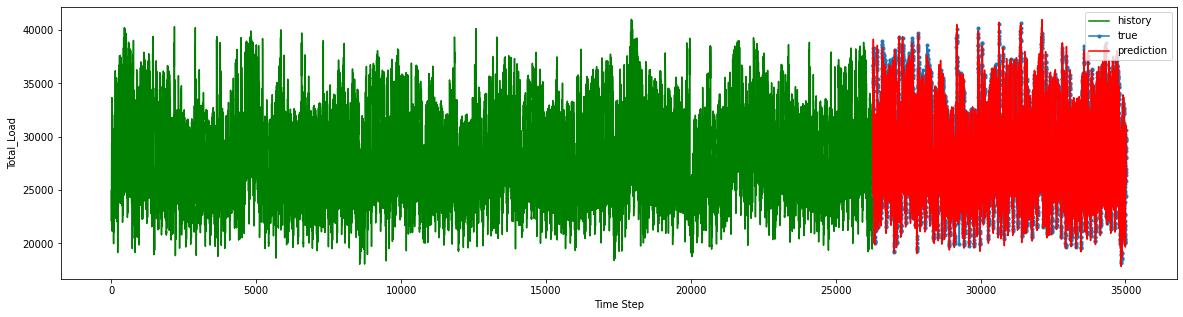

In [46]:
plt.figure(figsize=(20,5))
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Total_Load')
plt.xlabel('Time Step')
plt.legend()
plt.show();

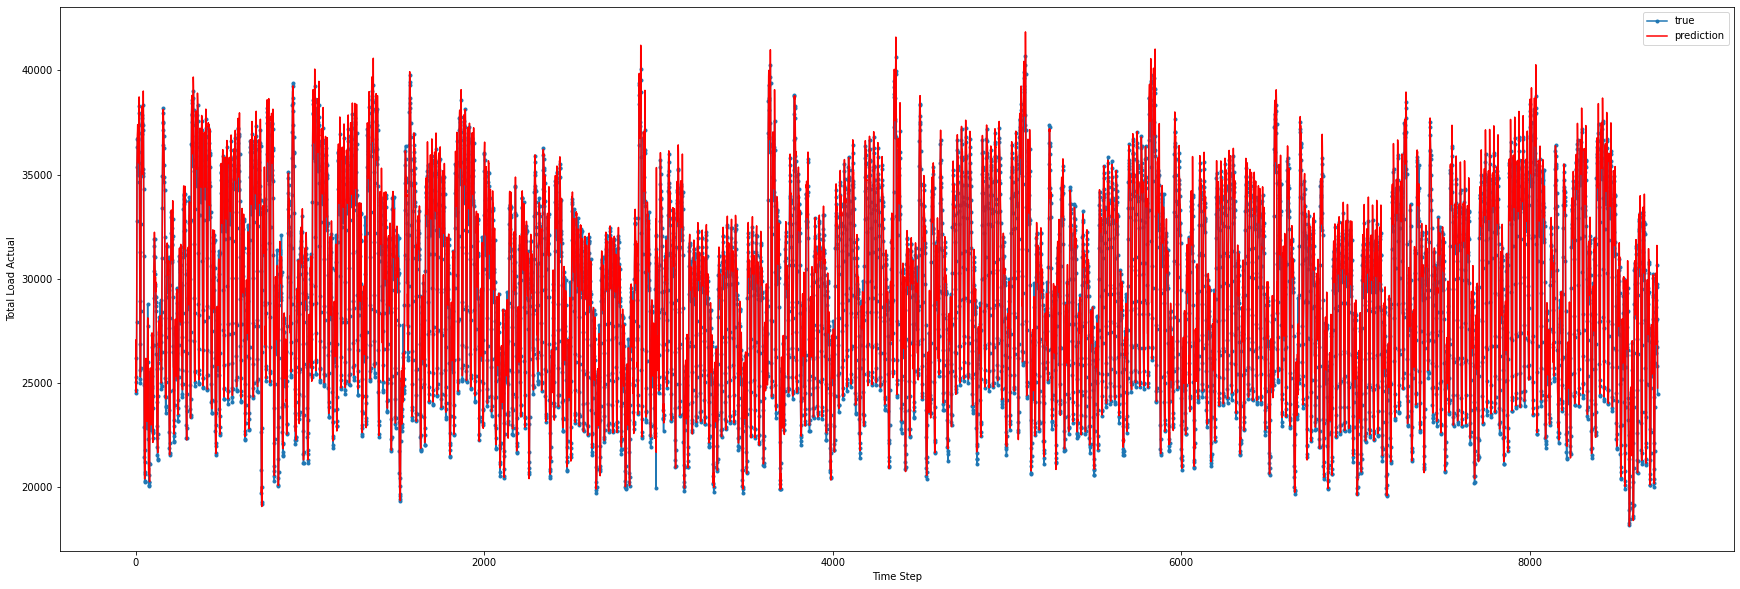

In [42]:
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Total Load Actual')
plt.xlabel('Time Step')
plt.legend()
plt.show();

Below we can try whatever parameters we want with our model

In [64]:
def lstm_model_2():
    model = keras.Sequential()
    model.add(
      keras.layers.Bidirectional(
        keras.layers.LSTM(
          units = 256,
          input_shape=(X_train.shape[1], X_train.shape[2])
        )
      )
    )
    model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [65]:
start_time = time.time()
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=13)
model2 = lstm_model_2()
history = model2.fit(
    X_train, y_train, 
    epochs=200, 
    batch_size=30, 
    validation_split=0.1,
    shuffle=False,
    verbose = 1,
    callbacks = [stop_early]
)
print("--- %s minutes ---" % float((time.time() - start_time)/60))

Epoch 1/200
789/789 [==============================] - 46s 55ms/step - loss: 0.0859 - val_loss: 0.0252
Epoch 2/200
789/789 [==============================] - 40s 51ms/step - loss: 0.0214 - val_loss: 0.0163
Epoch 3/200
789/789 [==============================] - 41s 52ms/step - loss: 0.0135 - val_loss: 0.0120
Epoch 4/200
789/789 [==============================] - 41s 52ms/step - loss: 0.0123 - val_loss: 0.0118
Epoch 5/200
789/789 [==============================] - 41s 52ms/step - loss: 0.0109 - val_loss: 0.0123
Epoch 6/200
789/789 [==============================] - 40s 50ms/step - loss: 0.0094 - val_loss: 0.0116
Epoch 7/200
789/789 [==============================] - 39s 50ms/step - loss: 0.0095 - val_loss: 0.0157
Epoch 8/200
789/789 [==============================] - 40s 51ms/step - loss: 0.0093 - val_loss: 0.0153
Epoch 9/200
789/789 [==============================] - 40s 50ms/step - loss: 0.0086 - val_loss: 0.0151
Epoch 10/200
789/789 [==============================] - 40s 50ms/step - l

In [1]:
!pip freeze > projecaret.txt

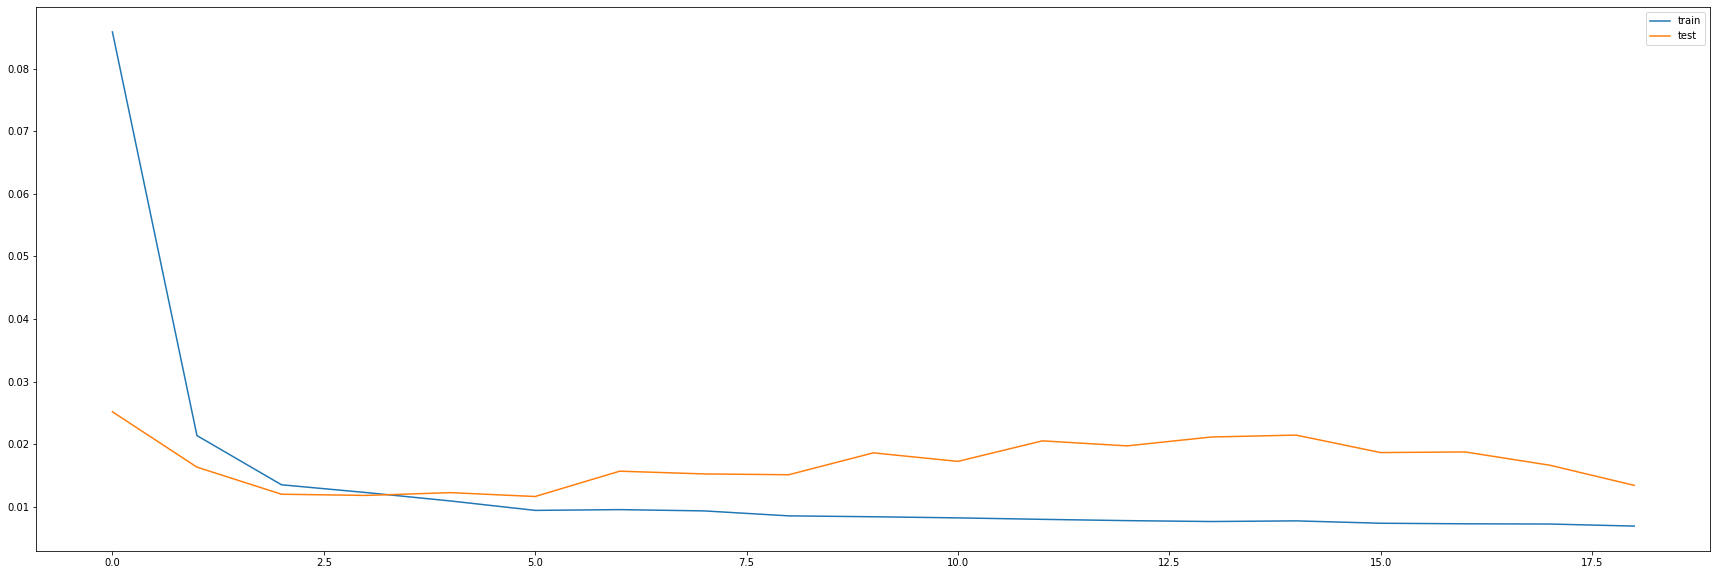

In [73]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [197]:
y_pred = model2.predict(X_test)

273/273 [==============================] - 8s 30ms/step


In [198]:
y_train_inv = load_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = load_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = load_transformer.inverse_transform(y_pred)

In [199]:
y_test_inv.flatten()

array([26180., 25063., 24672., ..., 28071., 25801., 24455.])

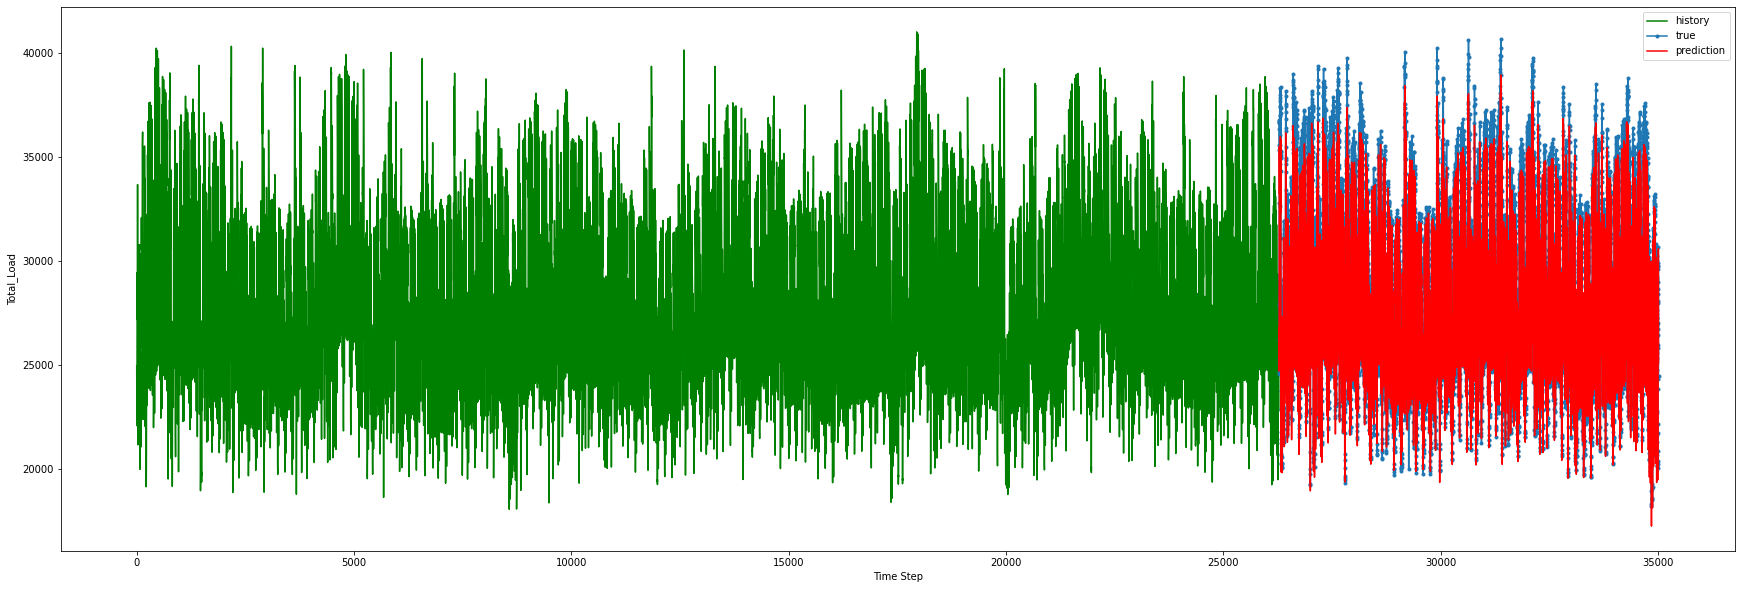

In [200]:
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Total_Load')
plt.xlabel('Time Step')
plt.legend()
plt.show();
plt.rcParams['figure.figsize'] = [30, 10]

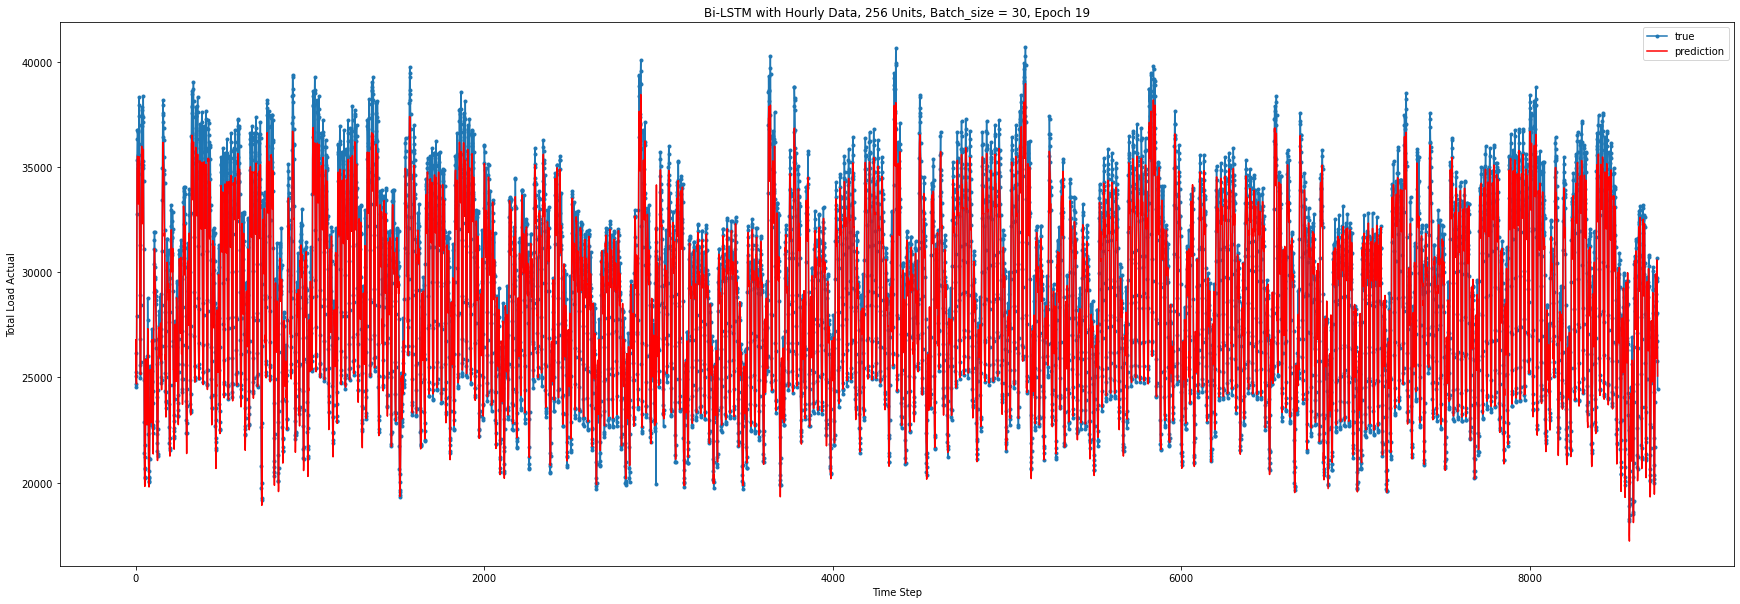

In [201]:
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Total Load Actual')
plt.xlabel('Time Step')
plt.title('Bi-LSTM with Hourly Data, 256 Units, Batch_size = 30, Epoch 19')
plt.legend()
plt.show();

In [202]:
print('R2 Score for LSTM Model =',r2_score(y_test_inv.flatten(), y_pred_inv.flatten()))
print('MAPE Score for LSTM Model=', mean_absolute_percentage_error(y_test_inv.flatten(), y_pred_inv.flatten()))
print('MAE Score for LSTM Model=', mean_absolute_error(y_test_inv.flatten(), y_pred_inv.flatten()))

R2 Score for LSTM Model = 0.9495098125001822
MAPE Score for LSTM Model= 0.02574767258277429
MAE Score for LSTM Model= 781.4815337453492


# LSTM Model (Daily Basis)

In [209]:
categorical_features_day = ["year","month","day","season"]
le = LabelEncoder()
labels_daily = daily_df[categorical_features_day].apply(le.fit_transform)

lstm_daily_df = pd.concat([labels_daily, daily_df[["hols", "total_load_actual"]]],axis=1)

lstm_daily_train, lstm_daily_test = lstm_daily_df[lstm_daily_df.year < 3], lstm_daily_df[lstm_daily_df.year == 3]
print(lstm_daily_train.shape)
print(lstm_daily_test.shape)
train_dates = pd.to_datetime(daily_df[daily_df.year < 2018]['date'])

(1096, 6)
(365, 6)


In [210]:
#We scale the total load actual between -1.4 to 1.6
load_transformer = RobustScaler()
load_transformer_daily = load_transformer.fit(lstm_daily_train[['total_load_actual']])
lstm_daily_train['total_load_actual'] = load_transformer_daily.transform(lstm_daily_train[['total_load_actual']])

lstm_daily_test['total_load_actual'] = load_transformer_daily.transform(lstm_daily_test[['total_load_actual']])
#Taking the previous 7 days as our timesteps
time_steps = 14

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(lstm_daily_train, lstm_daily_train.total_load_actual, time_steps)
X_test, y_test = create_dataset(lstm_daily_test, lstm_daily_test.total_load_actual, time_steps)


print(X_train.shape, y_train.shape)

(1082, 14, 6) (1082,)


C:\Users\MONSTER\AppData\Local\Temp\ipykernel_24336\846780825.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lstm_daily_train['total_load_actual'] = load_transformer_daily.transform(lstm_daily_train[['total_load_actual']])
C:\Users\MONSTER\AppData\Local\Temp\ipykernel_24336\846780825.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lstm_daily_test['total_load_actual'] = load_transformer_daily.transform(lstm_daily_test[['total_load_actual']])


In [172]:
def lstm_daily():
    model = keras.Sequential()
    #model.add(keras.layers.LSTM(128, activation='sigmoid', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    #model.add(keras.layers.LSTM(64, activation='sigmoid', return_sequences=False))
    model.add(
      keras.layers.Bidirectional(
        keras.layers.LSTM(
          units = 128,
          input_shape=(X_train.shape[1], X_train.shape[2])
        )
      )
    )
    
    model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.Dense(units=1))
    model.compile(loss='mse', optimizer='adam')
    return model

In [173]:
results = pd.DataFrame()

tot_time_s = time.time()
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
batch_size = [8, 16, 32, 64, 128]
epochs = [20,40,60,80,100]

for batch_s in batch_size:
    for ep in epochs:
        start_time = time.time()
        model3 = lstm_daily()
        print('Epoch: ',ep,'and Batch_Size:',batch_s)
        history=model3.fit(X_train,y_train,epochs=ep,batch_size=batch_s,validation_split = 0.1 ,verbose=2, callbacks= [stop_early])
        end_time = time.time()
        run_time = end_time - start_time
        model_name = 'Model_' + 'Batch_size_' + str(batch_s) +'Epoch'+ str(ep)
        model3.save(model_name + '.h5')
        results = results.append({'run':        model_name,
                                          'run_time':   run_time,
                                          'fin_epoch': (history.history['val_loss'].index(min(history.history['val_loss']))+1),
                                          #'optimizer':  optimizer_name,
                                          'loss':       round(history.history['loss'][-1]),
                                          'val_loss':   round(min(history.history['val_loss']),3),
                                          'train_len':  len(X_train),
                            
                                         },
                                         ignore_index = True)
print("--- %s minutes ---" % float((time.time() - tot_time_s)/60))
results.to_csv('training_results.csv')

Epoch:  20 and Batch_Size: 8
Epoch 1/20
122/122 - 4s - loss: 0.5829 - val_loss: 0.5765 - 4s/epoch - 33ms/step
Epoch 2/20
122/122 - 1s - loss: 0.5103 - val_loss: 0.5978 - 1s/epoch - 9ms/step
Epoch 3/20
122/122 - 1s - loss: 0.4715 - val_loss: 0.4198 - 1s/epoch - 10ms/step
Epoch 4/20
122/122 - 1s - loss: 0.4302 - val_loss: 0.3793 - 1s/epoch - 9ms/step
Epoch 5/20
122/122 - 1s - loss: 0.4107 - val_loss: 0.3918 - 1s/epoch - 9ms/step
Epoch 6/20
122/122 - 1s - loss: 0.3802 - val_loss: 0.3544 - 1s/epoch - 10ms/step
Epoch 7/20
122/122 - 1s - loss: 0.3855 - val_loss: 0.3747 - 1s/epoch - 9ms/step
Epoch 8/20
122/122 - 1s - loss: 0.3769 - val_loss: 0.3562 - 1s/epoch - 9ms/step
Epoch 9/20
122/122 - 1s - loss: 0.3589 - val_loss: 0.3828 - 1s/epoch - 9ms/step
Epoch 10/20
122/122 - 1s - loss: 0.3599 - val_loss: 0.4141 - 1s/epoch - 9ms/step
Epoch 11/20
122/122 - 1s - loss: 0.3523 - val_loss: 0.3784 - 1s/epoch - 10ms/step
Epoch 12/20
122/122 - 1s - loss: 0.3328 - val_loss: 0.3459 - 1s/epoch - 10ms/step
Epo

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_24336\3227654064.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'run':        model_name,


122/122 - 4s - loss: 0.5526 - val_loss: 0.4948 - 4s/epoch - 33ms/step
Epoch 2/40
122/122 - 1s - loss: 0.5135 - val_loss: 0.4284 - 1s/epoch - 9ms/step
Epoch 3/40
122/122 - 1s - loss: 0.4717 - val_loss: 0.3717 - 1s/epoch - 9ms/step
Epoch 4/40
122/122 - 1s - loss: 0.4322 - val_loss: 0.3559 - 1s/epoch - 10ms/step
Epoch 5/40
122/122 - 1s - loss: 0.3991 - val_loss: 0.4046 - 1s/epoch - 9ms/step
Epoch 6/40
122/122 - 1s - loss: 0.3800 - val_loss: 0.3769 - 1s/epoch - 10ms/step
Epoch 7/40
122/122 - 1s - loss: 0.3817 - val_loss: 0.3557 - 1s/epoch - 10ms/step
Epoch 8/40
122/122 - 1s - loss: 0.3619 - val_loss: 0.3645 - 1s/epoch - 10ms/step
Epoch 9/40
122/122 - 1s - loss: 0.3609 - val_loss: 0.3690 - 1s/epoch - 9ms/step
Epoch 10/40
122/122 - 1s - loss: 0.3665 - val_loss: 0.3681 - 1s/epoch - 9ms/step
Epoch 11/40
122/122 - 1s - loss: 0.3452 - val_loss: 0.3441 - 1s/epoch - 10ms/step
Epoch 12/40
122/122 - 1s - loss: 0.3448 - val_loss: 0.3321 - 1s/epoch - 10ms/step
Epoch 13/40
122/122 - 1s - loss: 0.3342 -

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_24336\3227654064.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'run':        model_name,


122/122 - 4s - loss: 0.6026 - val_loss: 0.4862 - 4s/epoch - 36ms/step
Epoch 2/60
122/122 - 1s - loss: 0.5174 - val_loss: 0.4291 - 1s/epoch - 10ms/step
Epoch 3/60
122/122 - 1s - loss: 0.4803 - val_loss: 0.4265 - 1s/epoch - 11ms/step
Epoch 4/60
122/122 - 1s - loss: 0.4647 - val_loss: 0.3899 - 1s/epoch - 10ms/step
Epoch 5/60
122/122 - 1s - loss: 0.4257 - val_loss: 0.3838 - 1s/epoch - 11ms/step
Epoch 6/60
122/122 - 1s - loss: 0.3872 - val_loss: 0.3578 - 1s/epoch - 11ms/step
Epoch 7/60
122/122 - 1s - loss: 0.3860 - val_loss: 0.3659 - 1s/epoch - 11ms/step
Epoch 8/60
122/122 - 2s - loss: 0.3811 - val_loss: 0.3577 - 2s/epoch - 15ms/step
Epoch 9/60
122/122 - 2s - loss: 0.3687 - val_loss: 0.3983 - 2s/epoch - 14ms/step
Epoch 10/60
122/122 - 1s - loss: 0.3562 - val_loss: 0.4212 - 1s/epoch - 11ms/step
Epoch 11/60
122/122 - 1s - loss: 0.3520 - val_loss: 0.3679 - 1s/epoch - 11ms/step
Epoch 12/60
122/122 - 1s - loss: 0.3409 - val_loss: 0.3642 - 1s/epoch - 11ms/step
Epoch 13/60
122/122 - 1s - loss: 0.3

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_24336\3227654064.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'run':        model_name,


122/122 - 5s - loss: 0.6051 - val_loss: 0.4650 - 5s/epoch - 41ms/step
Epoch 2/80
122/122 - 1s - loss: 0.5117 - val_loss: 0.4218 - 1s/epoch - 10ms/step
Epoch 3/80
122/122 - 1s - loss: 0.4687 - val_loss: 0.3882 - 1s/epoch - 10ms/step
Epoch 4/80
122/122 - 1s - loss: 0.4376 - val_loss: 0.3698 - 1s/epoch - 10ms/step
Epoch 5/80
122/122 - 1s - loss: 0.4171 - val_loss: 0.3894 - 1s/epoch - 10ms/step
Epoch 6/80
122/122 - 1s - loss: 0.3994 - val_loss: 0.3612 - 1s/epoch - 10ms/step
Epoch 7/80
122/122 - 1s - loss: 0.3746 - val_loss: 0.4954 - 1s/epoch - 11ms/step
Epoch 8/80
122/122 - 1s - loss: 0.3709 - val_loss: 0.4401 - 1s/epoch - 11ms/step
Epoch 9/80
122/122 - 1s - loss: 0.3686 - val_loss: 0.3436 - 1s/epoch - 11ms/step
Epoch 10/80
122/122 - 1s - loss: 0.3595 - val_loss: 0.3403 - 1s/epoch - 10ms/step
Epoch 11/80
122/122 - 1s - loss: 0.3442 - val_loss: 0.3443 - 1s/epoch - 10ms/step
Epoch 12/80
122/122 - 1s - loss: 0.3415 - val_loss: 0.3703 - 1s/epoch - 10ms/step
Epoch 13/80
122/122 - 1s - loss: 0.3

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_24336\3227654064.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'run':        model_name,


122/122 - 4s - loss: 0.5997 - val_loss: 0.4790 - 4s/epoch - 34ms/step
Epoch 2/100
122/122 - 1s - loss: 0.5186 - val_loss: 0.4489 - 1s/epoch - 10ms/step
Epoch 3/100
122/122 - 1s - loss: 0.4721 - val_loss: 0.3791 - 1s/epoch - 10ms/step
Epoch 4/100
122/122 - 1s - loss: 0.4212 - val_loss: 0.3701 - 1s/epoch - 10ms/step
Epoch 5/100
122/122 - 1s - loss: 0.3918 - val_loss: 0.3464 - 1s/epoch - 10ms/step
Epoch 6/100
122/122 - 1s - loss: 0.3873 - val_loss: 0.4111 - 1s/epoch - 10ms/step
Epoch 7/100
122/122 - 1s - loss: 0.3713 - val_loss: 0.3651 - 1s/epoch - 10ms/step
Epoch 8/100
122/122 - 1s - loss: 0.3678 - val_loss: 0.3559 - 1s/epoch - 10ms/step
Epoch 9/100
122/122 - 1s - loss: 0.3619 - val_loss: 0.3303 - 1s/epoch - 10ms/step
Epoch 10/100
122/122 - 1s - loss: 0.3539 - val_loss: 0.3392 - 1s/epoch - 10ms/step
Epoch 11/100
122/122 - 1s - loss: 0.3483 - val_loss: 0.3359 - 1s/epoch - 10ms/step
Epoch 12/100
122/122 - 1s - loss: 0.3368 - val_loss: 0.3417 - 1s/epoch - 10ms/step
Epoch 13/100
122/122 - 1s

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_24336\3227654064.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'run':        model_name,


61/61 - 4s - loss: 0.5864 - val_loss: 0.5119 - 4s/epoch - 66ms/step
Epoch 2/20
61/61 - 1s - loss: 0.5210 - val_loss: 0.4522 - 1s/epoch - 18ms/step
Epoch 3/20
61/61 - 1s - loss: 0.4976 - val_loss: 0.4179 - 1s/epoch - 18ms/step
Epoch 4/20
61/61 - 1s - loss: 0.4818 - val_loss: 0.4256 - 1s/epoch - 19ms/step
Epoch 5/20
61/61 - 1s - loss: 0.4497 - val_loss: 0.3796 - 1s/epoch - 19ms/step
Epoch 6/20
61/61 - 1s - loss: 0.4282 - val_loss: 0.3971 - 1s/epoch - 19ms/step
Epoch 7/20
61/61 - 1s - loss: 0.4133 - val_loss: 0.3594 - 1s/epoch - 18ms/step
Epoch 8/20
61/61 - 1s - loss: 0.3951 - val_loss: 0.3499 - 1s/epoch - 18ms/step
Epoch 9/20
61/61 - 1s - loss: 0.3937 - val_loss: 0.3723 - 1s/epoch - 18ms/step
Epoch 10/20
61/61 - 1s - loss: 0.3748 - val_loss: 0.4196 - 1s/epoch - 19ms/step
Epoch 11/20
61/61 - 1s - loss: 0.3870 - val_loss: 0.3490 - 1s/epoch - 20ms/step
Epoch 12/20
61/61 - 1s - loss: 0.3616 - val_loss: 0.3443 - 1s/epoch - 20ms/step
Epoch 13/20
61/61 - 1s - loss: 0.3560 - val_loss: 0.3705 - 1

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_24336\3227654064.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'run':        model_name,


61/61 - 5s - loss: 0.5786 - val_loss: 0.5624 - 5s/epoch - 74ms/step
Epoch 2/40
61/61 - 1s - loss: 0.5204 - val_loss: 0.4494 - 1s/epoch - 19ms/step
Epoch 3/40
61/61 - 1s - loss: 0.4916 - val_loss: 0.4312 - 1s/epoch - 19ms/step
Epoch 4/40
61/61 - 1s - loss: 0.4560 - val_loss: 0.4760 - 1s/epoch - 19ms/step
Epoch 5/40
61/61 - 1s - loss: 0.4332 - val_loss: 0.3932 - 1s/epoch - 20ms/step
Epoch 6/40
61/61 - 1s - loss: 0.4144 - val_loss: 0.4066 - 1s/epoch - 20ms/step
Epoch 7/40
61/61 - 1s - loss: 0.4054 - val_loss: 0.4084 - 1s/epoch - 20ms/step
Epoch 8/40
61/61 - 1s - loss: 0.3834 - val_loss: 0.3767 - 1s/epoch - 20ms/step
Epoch 9/40
61/61 - 1s - loss: 0.3739 - val_loss: 0.3993 - 1s/epoch - 19ms/step
Epoch 10/40
61/61 - 1s - loss: 0.3648 - val_loss: 0.3908 - 1s/epoch - 20ms/step
Epoch 11/40
61/61 - 1s - loss: 0.3632 - val_loss: 0.4251 - 1s/epoch - 19ms/step
Epoch 12/40
61/61 - 1s - loss: 0.3535 - val_loss: 0.3632 - 1s/epoch - 20ms/step
Epoch 13/40
61/61 - 1s - loss: 0.3478 - val_loss: 0.3749 - 1

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_24336\3227654064.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'run':        model_name,


61/61 - 4s - loss: 0.5860 - val_loss: 0.5213 - 4s/epoch - 67ms/step
Epoch 2/60
61/61 - 1s - loss: 0.5290 - val_loss: 0.4653 - 1s/epoch - 19ms/step
Epoch 3/60
61/61 - 1s - loss: 0.4897 - val_loss: 0.4454 - 1s/epoch - 19ms/step
Epoch 4/60
61/61 - 1s - loss: 0.4574 - val_loss: 0.4209 - 1s/epoch - 19ms/step
Epoch 5/60
61/61 - 1s - loss: 0.4455 - val_loss: 0.3853 - 1s/epoch - 20ms/step
Epoch 6/60
61/61 - 1s - loss: 0.4194 - val_loss: 0.3577 - 1s/epoch - 19ms/step
Epoch 7/60
61/61 - 1s - loss: 0.3933 - val_loss: 0.3901 - 1s/epoch - 19ms/step
Epoch 8/60
61/61 - 1s - loss: 0.3883 - val_loss: 0.3613 - 1s/epoch - 19ms/step
Epoch 9/60
61/61 - 1s - loss: 0.3909 - val_loss: 0.3651 - 1s/epoch - 19ms/step
Epoch 10/60
61/61 - 1s - loss: 0.3736 - val_loss: 0.3987 - 1s/epoch - 19ms/step
Epoch 11/60
61/61 - 1s - loss: 0.3658 - val_loss: 0.3816 - 1s/epoch - 19ms/step
Epoch 12/60
61/61 - 1s - loss: 0.3585 - val_loss: 0.3490 - 1s/epoch - 20ms/step
Epoch 13/60
61/61 - 1s - loss: 0.3562 - val_loss: 0.4116 - 1

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_24336\3227654064.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'run':        model_name,


61/61 - 4s - loss: 0.6025 - val_loss: 0.5023 - 4s/epoch - 73ms/step
Epoch 2/80
61/61 - 1s - loss: 0.5113 - val_loss: 0.4542 - 1s/epoch - 21ms/step
Epoch 3/80
61/61 - 1s - loss: 0.4759 - val_loss: 0.4701 - 1s/epoch - 21ms/step
Epoch 4/80
61/61 - 1s - loss: 0.4563 - val_loss: 0.4181 - 1s/epoch - 20ms/step
Epoch 5/80
61/61 - 1s - loss: 0.4367 - val_loss: 0.3715 - 1s/epoch - 20ms/step
Epoch 6/80
61/61 - 1s - loss: 0.4201 - val_loss: 0.3976 - 1s/epoch - 20ms/step
Epoch 7/80
61/61 - 1s - loss: 0.4029 - val_loss: 0.3817 - 1s/epoch - 19ms/step
Epoch 8/80
61/61 - 1s - loss: 0.3918 - val_loss: 0.3848 - 1s/epoch - 20ms/step
Epoch 9/80
61/61 - 1s - loss: 0.3778 - val_loss: 0.3681 - 1s/epoch - 20ms/step
Epoch 10/80
61/61 - 1s - loss: 0.3775 - val_loss: 0.3570 - 1s/epoch - 20ms/step
Epoch 11/80
61/61 - 1s - loss: 0.3676 - val_loss: 0.3619 - 1s/epoch - 20ms/step
Epoch 12/80
61/61 - 1s - loss: 0.3595 - val_loss: 0.3739 - 1s/epoch - 20ms/step
Epoch 13/80
61/61 - 1s - loss: 0.3501 - val_loss: 0.3513 - 1

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_24336\3227654064.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'run':        model_name,


61/61 - 5s - loss: 0.6079 - val_loss: 0.5561 - 5s/epoch - 74ms/step
Epoch 2/100
61/61 - 1s - loss: 0.5258 - val_loss: 0.4566 - 1s/epoch - 21ms/step
Epoch 3/100
61/61 - 1s - loss: 0.4901 - val_loss: 0.4438 - 1s/epoch - 21ms/step
Epoch 4/100
61/61 - 1s - loss: 0.4676 - val_loss: 0.4094 - 1s/epoch - 21ms/step
Epoch 5/100
61/61 - 1s - loss: 0.4355 - val_loss: 0.3849 - 1s/epoch - 21ms/step
Epoch 6/100
61/61 - 1s - loss: 0.4221 - val_loss: 0.3773 - 1s/epoch - 21ms/step
Epoch 7/100
61/61 - 1s - loss: 0.4084 - val_loss: 0.3615 - 1s/epoch - 21ms/step
Epoch 8/100
61/61 - 1s - loss: 0.3954 - val_loss: 0.3641 - 1s/epoch - 21ms/step
Epoch 9/100
61/61 - 1s - loss: 0.3841 - val_loss: 0.3600 - 1s/epoch - 21ms/step
Epoch 10/100
61/61 - 1s - loss: 0.3694 - val_loss: 0.3794 - 1s/epoch - 21ms/step
Epoch 11/100
61/61 - 1s - loss: 0.3621 - val_loss: 0.3434 - 1s/epoch - 21ms/step
Epoch 12/100
61/61 - 1s - loss: 0.3711 - val_loss: 0.3876 - 1s/epoch - 21ms/step
Epoch 13/100
61/61 - 1s - loss: 0.3604 - val_loss

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_24336\3227654064.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'run':        model_name,


31/31 - 4s - loss: 0.6058 - val_loss: 0.6400 - 4s/epoch - 127ms/step
Epoch 2/20
31/31 - 1s - loss: 0.5558 - val_loss: 0.5006 - 1s/epoch - 33ms/step
Epoch 3/20
31/31 - 1s - loss: 0.5221 - val_loss: 0.5065 - 1s/epoch - 34ms/step
Epoch 4/20
31/31 - 1s - loss: 0.5194 - val_loss: 0.4582 - 1s/epoch - 34ms/step
Epoch 5/20
31/31 - 1s - loss: 0.4697 - val_loss: 0.4441 - 1s/epoch - 33ms/step
Epoch 6/20
31/31 - 1s - loss: 0.4606 - val_loss: 0.4061 - 1s/epoch - 34ms/step
Epoch 7/20
31/31 - 1s - loss: 0.4342 - val_loss: 0.3811 - 1s/epoch - 34ms/step
Epoch 8/20
31/31 - 1s - loss: 0.4116 - val_loss: 0.4006 - 1s/epoch - 33ms/step
Epoch 9/20
31/31 - 1s - loss: 0.3924 - val_loss: 0.3728 - 982ms/epoch - 32ms/step
Epoch 10/20
31/31 - 1s - loss: 0.3845 - val_loss: 0.3567 - 992ms/epoch - 32ms/step
Epoch 11/20
31/31 - 1s - loss: 0.3839 - val_loss: 0.4014 - 982ms/epoch - 32ms/step
Epoch 12/20
31/31 - 1s - loss: 0.3764 - val_loss: 0.3485 - 1s/epoch - 32ms/step
Epoch 13/20
31/31 - 1s - loss: 0.3681 - val_loss: 

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_24336\3227654064.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'run':        model_name,


31/31 - 4s - loss: 0.5884 - val_loss: 0.5258 - 4s/epoch - 124ms/step
Epoch 2/40
31/31 - 1s - loss: 0.5479 - val_loss: 0.4795 - 979ms/epoch - 32ms/step
Epoch 3/40
31/31 - 1s - loss: 0.5048 - val_loss: 0.4942 - 983ms/epoch - 32ms/step
Epoch 4/40
31/31 - 1s - loss: 0.4916 - val_loss: 0.4880 - 987ms/epoch - 32ms/step
Epoch 5/40
31/31 - 1s - loss: 0.4735 - val_loss: 0.4397 - 991ms/epoch - 32ms/step
Epoch 6/40
31/31 - 1s - loss: 0.4565 - val_loss: 0.4084 - 990ms/epoch - 32ms/step
Epoch 7/40
31/31 - 1s - loss: 0.4340 - val_loss: 0.3642 - 1s/epoch - 33ms/step
Epoch 8/40
31/31 - 1s - loss: 0.4115 - val_loss: 0.3859 - 1s/epoch - 34ms/step
Epoch 9/40
31/31 - 1s - loss: 0.3840 - val_loss: 0.3543 - 1s/epoch - 33ms/step
Epoch 10/40
31/31 - 1s - loss: 0.3789 - val_loss: 0.3643 - 1s/epoch - 34ms/step
Epoch 11/40
31/31 - 1s - loss: 0.3783 - val_loss: 0.3768 - 1s/epoch - 32ms/step
Epoch 12/40
31/31 - 1s - loss: 0.3707 - val_loss: 0.3540 - 993ms/epoch - 32ms/step
Epoch 13/40
31/31 - 1s - loss: 0.3553 - v

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_24336\3227654064.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'run':        model_name,


31/31 - 4s - loss: 0.6055 - val_loss: 0.5925 - 4s/epoch - 138ms/step
Epoch 2/60
31/31 - 1s - loss: 0.5751 - val_loss: 0.4473 - 1s/epoch - 35ms/step
Epoch 3/60
31/31 - 1s - loss: 0.5151 - val_loss: 0.4297 - 1s/epoch - 34ms/step
Epoch 4/60
31/31 - 1s - loss: 0.4807 - val_loss: 0.4427 - 1s/epoch - 34ms/step
Epoch 5/60
31/31 - 1s - loss: 0.4615 - val_loss: 0.4217 - 1s/epoch - 33ms/step
Epoch 6/60
31/31 - 1s - loss: 0.4450 - val_loss: 0.4189 - 1s/epoch - 33ms/step
Epoch 7/60
31/31 - 1s - loss: 0.4258 - val_loss: 0.4044 - 1s/epoch - 33ms/step
Epoch 8/60
31/31 - 1s - loss: 0.4601 - val_loss: 0.4422 - 1s/epoch - 32ms/step
Epoch 9/60
31/31 - 1s - loss: 0.4115 - val_loss: 0.4107 - 1s/epoch - 34ms/step
Epoch 10/60
31/31 - 1s - loss: 0.3867 - val_loss: 0.3422 - 1s/epoch - 34ms/step
Epoch 11/60
31/31 - 1s - loss: 0.3845 - val_loss: 0.3443 - 997ms/epoch - 32ms/step
Epoch 12/60
31/31 - 1s - loss: 0.3691 - val_loss: 0.3456 - 996ms/epoch - 32ms/step
Epoch 13/60
31/31 - 1s - loss: 0.3667 - val_loss: 0.3

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_24336\3227654064.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'run':        model_name,


31/31 - 4s - loss: 0.5874 - val_loss: 0.5137 - 4s/epoch - 127ms/step
Epoch 2/80
31/31 - 1s - loss: 0.5436 - val_loss: 0.5600 - 1s/epoch - 33ms/step
Epoch 3/80
31/31 - 1s - loss: 0.5043 - val_loss: 0.5585 - 1s/epoch - 34ms/step
Epoch 4/80
31/31 - 1s - loss: 0.4911 - val_loss: 0.4752 - 1s/epoch - 33ms/step
Epoch 5/80
31/31 - 1s - loss: 0.4846 - val_loss: 0.4297 - 1s/epoch - 34ms/step
Epoch 6/80
31/31 - 1s - loss: 0.4618 - val_loss: 0.4570 - 1s/epoch - 33ms/step
Epoch 7/80
31/31 - 1s - loss: 0.4320 - val_loss: 0.3653 - 1s/epoch - 34ms/step
Epoch 8/80
31/31 - 1s - loss: 0.4133 - val_loss: 0.3830 - 1s/epoch - 33ms/step
Epoch 9/80
31/31 - 1s - loss: 0.4107 - val_loss: 0.3512 - 1s/epoch - 32ms/step
Epoch 10/80
31/31 - 1s - loss: 0.3903 - val_loss: 0.3731 - 994ms/epoch - 32ms/step
Epoch 11/80
31/31 - 1s - loss: 0.3831 - val_loss: 0.3588 - 1s/epoch - 33ms/step
Epoch 12/80
31/31 - 1s - loss: 0.3729 - val_loss: 0.3596 - 993ms/epoch - 32ms/step
Epoch 13/80
31/31 - 1s - loss: 0.3698 - val_loss: 0.3

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_24336\3227654064.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'run':        model_name,


31/31 - 4s - loss: 0.5965 - val_loss: 0.5080 - 4s/epoch - 125ms/step
Epoch 2/100
31/31 - 1s - loss: 0.5297 - val_loss: 0.5251 - 1s/epoch - 33ms/step
Epoch 3/100
31/31 - 1s - loss: 0.4953 - val_loss: 0.4319 - 1s/epoch - 33ms/step
Epoch 4/100
31/31 - 1s - loss: 0.4571 - val_loss: 0.4280 - 996ms/epoch - 32ms/step
Epoch 5/100
31/31 - 1s - loss: 0.4671 - val_loss: 0.3987 - 1s/epoch - 33ms/step
Epoch 6/100
31/31 - 1s - loss: 0.4592 - val_loss: 0.3800 - 988ms/epoch - 32ms/step
Epoch 7/100
31/31 - 1s - loss: 0.4177 - val_loss: 0.3692 - 992ms/epoch - 32ms/step
Epoch 8/100
31/31 - 1s - loss: 0.4181 - val_loss: 0.3577 - 992ms/epoch - 32ms/step
Epoch 9/100
31/31 - 1s - loss: 0.4045 - val_loss: 0.3482 - 990ms/epoch - 32ms/step
Epoch 10/100
31/31 - 1s - loss: 0.4174 - val_loss: 0.3451 - 999ms/epoch - 32ms/step
Epoch 11/100
31/31 - 1s - loss: 0.3782 - val_loss: 0.4347 - 1s/epoch - 32ms/step
Epoch 12/100
31/31 - 1s - loss: 0.3875 - val_loss: 0.3770 - 982ms/epoch - 32ms/step
Epoch 13/100
31/31 - 1s - l

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_24336\3227654064.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'run':        model_name,


16/16 - 4s - loss: 0.7209 - val_loss: 0.5997 - 4s/epoch - 279ms/step
Epoch 2/20
16/16 - 1s - loss: 0.6140 - val_loss: 0.5466 - 1s/epoch - 71ms/step
Epoch 3/20
16/16 - 1s - loss: 0.5542 - val_loss: 0.5076 - 1s/epoch - 73ms/step
Epoch 4/20
16/16 - 1s - loss: 0.5217 - val_loss: 0.4978 - 1s/epoch - 68ms/step
Epoch 5/20
16/16 - 1s - loss: 0.4882 - val_loss: 0.4762 - 1s/epoch - 69ms/step
Epoch 6/20
16/16 - 1s - loss: 0.4902 - val_loss: 0.5035 - 1s/epoch - 69ms/step
Epoch 7/20
16/16 - 1s - loss: 0.4660 - val_loss: 0.4447 - 1s/epoch - 69ms/step
Epoch 8/20
16/16 - 1s - loss: 0.4678 - val_loss: 0.4127 - 1s/epoch - 69ms/step
Epoch 9/20
16/16 - 1s - loss: 0.4583 - val_loss: 0.4121 - 1s/epoch - 69ms/step
Epoch 10/20
16/16 - 1s - loss: 0.4457 - val_loss: 0.3953 - 1s/epoch - 68ms/step
Epoch 11/20
16/16 - 1s - loss: 0.4405 - val_loss: 0.3793 - 1s/epoch - 70ms/step
Epoch 12/20
16/16 - 1s - loss: 0.4074 - val_loss: 0.3670 - 1s/epoch - 71ms/step
Epoch 13/20
16/16 - 1s - loss: 0.4030 - val_loss: 0.3674 - 

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_24336\3227654064.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'run':        model_name,


16/16 - 4s - loss: 0.6210 - val_loss: 0.5565 - 4s/epoch - 255ms/step
Epoch 2/40
16/16 - 1s - loss: 0.5519 - val_loss: 0.5169 - 1s/epoch - 69ms/step
Epoch 3/40
16/16 - 1s - loss: 0.5262 - val_loss: 0.4739 - 1s/epoch - 70ms/step
Epoch 4/40
16/16 - 1s - loss: 0.5059 - val_loss: 0.4633 - 1s/epoch - 71ms/step
Epoch 5/40
16/16 - 1s - loss: 0.4997 - val_loss: 0.4450 - 1s/epoch - 68ms/step
Epoch 6/40
16/16 - 1s - loss: 0.4743 - val_loss: 0.4720 - 1s/epoch - 73ms/step
Epoch 7/40
16/16 - 1s - loss: 0.4613 - val_loss: 0.4162 - 1s/epoch - 70ms/step
Epoch 8/40
16/16 - 1s - loss: 0.4544 - val_loss: 0.4195 - 1s/epoch - 68ms/step
Epoch 9/40
16/16 - 1s - loss: 0.4457 - val_loss: 0.4143 - 1s/epoch - 67ms/step
Epoch 10/40
16/16 - 1s - loss: 0.4235 - val_loss: 0.3976 - 1s/epoch - 67ms/step
Epoch 11/40
16/16 - 1s - loss: 0.4050 - val_loss: 0.3710 - 1s/epoch - 68ms/step
Epoch 12/40
16/16 - 1s - loss: 0.4095 - val_loss: 0.3764 - 1s/epoch - 71ms/step
Epoch 13/40
16/16 - 1s - loss: 0.3908 - val_loss: 0.3711 - 

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_24336\3227654064.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'run':        model_name,


16/16 - 4s - loss: 0.6530 - val_loss: 0.6355 - 4s/epoch - 250ms/step
Epoch 2/60
16/16 - 1s - loss: 0.5583 - val_loss: 0.5767 - 1s/epoch - 70ms/step
Epoch 3/60
16/16 - 1s - loss: 0.5471 - val_loss: 0.5045 - 1s/epoch - 69ms/step
Epoch 4/60
16/16 - 1s - loss: 0.5132 - val_loss: 0.4564 - 1s/epoch - 70ms/step
Epoch 5/60
16/16 - 1s - loss: 0.4919 - val_loss: 0.4517 - 1s/epoch - 70ms/step
Epoch 6/60
16/16 - 1s - loss: 0.4964 - val_loss: 0.4297 - 1s/epoch - 68ms/step
Epoch 7/60
16/16 - 1s - loss: 0.4622 - val_loss: 0.4433 - 1s/epoch - 68ms/step
Epoch 8/60
16/16 - 1s - loss: 0.4695 - val_loss: 0.4995 - 1s/epoch - 68ms/step
Epoch 9/60
16/16 - 1s - loss: 0.4896 - val_loss: 0.4080 - 1s/epoch - 68ms/step
Epoch 10/60
16/16 - 1s - loss: 0.4482 - val_loss: 0.4004 - 1s/epoch - 68ms/step
Epoch 11/60
16/16 - 1s - loss: 0.4342 - val_loss: 0.4130 - 1s/epoch - 69ms/step
Epoch 12/60
16/16 - 1s - loss: 0.4272 - val_loss: 0.4713 - 1s/epoch - 71ms/step
Epoch 13/60
16/16 - 1s - loss: 0.4260 - val_loss: 0.3686 - 

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_24336\3227654064.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'run':        model_name,


16/16 - 4s - loss: 0.6952 - val_loss: 0.5514 - 4s/epoch - 280ms/step
Epoch 2/80
16/16 - 1s - loss: 0.5510 - val_loss: 0.5246 - 1s/epoch - 71ms/step
Epoch 3/80
16/16 - 1s - loss: 0.5176 - val_loss: 0.4921 - 1s/epoch - 69ms/step
Epoch 4/80
16/16 - 1s - loss: 0.5205 - val_loss: 0.5046 - 1s/epoch - 69ms/step
Epoch 5/80
16/16 - 1s - loss: 0.4930 - val_loss: 0.5200 - 1s/epoch - 68ms/step
Epoch 6/80
16/16 - 1s - loss: 0.4805 - val_loss: 0.4761 - 1s/epoch - 69ms/step
Epoch 7/80
16/16 - 1s - loss: 0.4884 - val_loss: 0.4372 - 1s/epoch - 69ms/step
Epoch 8/80
16/16 - 1s - loss: 0.4624 - val_loss: 0.4058 - 1s/epoch - 69ms/step
Epoch 9/80
16/16 - 1s - loss: 0.4590 - val_loss: 0.4448 - 1s/epoch - 68ms/step
Epoch 10/80
16/16 - 1s - loss: 0.4586 - val_loss: 0.4345 - 1s/epoch - 69ms/step
Epoch 11/80
16/16 - 1s - loss: 0.4574 - val_loss: 0.4126 - 1s/epoch - 68ms/step
Epoch 12/80
16/16 - 1s - loss: 0.4241 - val_loss: 0.3921 - 1s/epoch - 68ms/step
Epoch 13/80
16/16 - 1s - loss: 0.4144 - val_loss: 0.3705 - 

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_24336\3227654064.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'run':        model_name,


16/16 - 4s - loss: 0.6788 - val_loss: 0.5992 - 4s/epoch - 247ms/step
Epoch 2/100
16/16 - 1s - loss: 0.5669 - val_loss: 0.5841 - 1s/epoch - 69ms/step
Epoch 3/100
16/16 - 1s - loss: 0.5329 - val_loss: 0.4956 - 1s/epoch - 72ms/step
Epoch 4/100
16/16 - 1s - loss: 0.5225 - val_loss: 0.4675 - 1s/epoch - 69ms/step
Epoch 5/100
16/16 - 1s - loss: 0.4964 - val_loss: 0.4803 - 1s/epoch - 69ms/step
Epoch 6/100
16/16 - 1s - loss: 0.4858 - val_loss: 0.4277 - 1s/epoch - 70ms/step
Epoch 7/100
16/16 - 1s - loss: 0.4604 - val_loss: 0.4144 - 1s/epoch - 69ms/step
Epoch 8/100
16/16 - 1s - loss: 0.4679 - val_loss: 0.4219 - 1s/epoch - 71ms/step
Epoch 9/100
16/16 - 1s - loss: 0.4598 - val_loss: 0.3955 - 1s/epoch - 73ms/step
Epoch 10/100
16/16 - 1s - loss: 0.4334 - val_loss: 0.3790 - 1s/epoch - 70ms/step
Epoch 11/100
16/16 - 1s - loss: 0.4260 - val_loss: 0.3950 - 1s/epoch - 71ms/step
Epoch 12/100
16/16 - 1s - loss: 0.4094 - val_loss: 0.3975 - 1s/epoch - 73ms/step
Epoch 13/100
16/16 - 1s - loss: 0.4034 - val_los

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_24336\3227654064.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'run':        model_name,


8/8 - 5s - loss: 0.6548 - val_loss: 0.5572 - 5s/epoch - 656ms/step
Epoch 2/20
8/8 - 1s - loss: 0.5863 - val_loss: 0.7198 - 956ms/epoch - 120ms/step
Epoch 3/20
8/8 - 1s - loss: 0.5699 - val_loss: 0.4989 - 943ms/epoch - 118ms/step
Epoch 4/20
8/8 - 1s - loss: 0.5112 - val_loss: 0.5216 - 922ms/epoch - 115ms/step
Epoch 5/20
8/8 - 1s - loss: 0.5179 - val_loss: 0.4789 - 885ms/epoch - 111ms/step
Epoch 6/20
8/8 - 1s - loss: 0.5031 - val_loss: 0.4535 - 845ms/epoch - 106ms/step
Epoch 7/20
8/8 - 1s - loss: 0.4850 - val_loss: 0.4597 - 872ms/epoch - 109ms/step
Epoch 8/20
8/8 - 1s - loss: 0.4643 - val_loss: 0.4477 - 858ms/epoch - 107ms/step
Epoch 9/20
8/8 - 1s - loss: 0.4607 - val_loss: 0.4424 - 838ms/epoch - 105ms/step
Epoch 10/20
8/8 - 1s - loss: 0.4710 - val_loss: 0.4095 - 849ms/epoch - 106ms/step
Epoch 11/20
8/8 - 1s - loss: 0.4489 - val_loss: 0.4306 - 857ms/epoch - 107ms/step
Epoch 12/20
8/8 - 1s - loss: 0.4549 - val_loss: 0.4452 - 870ms/epoch - 109ms/step
Epoch 13/20
8/8 - 1s - loss: 0.4426 - v

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_24336\3227654064.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'run':        model_name,


8/8 - 4s - loss: 0.6979 - val_loss: 0.5749 - 4s/epoch - 514ms/step
Epoch 2/40
8/8 - 1s - loss: 0.5825 - val_loss: 0.6029 - 856ms/epoch - 107ms/step
Epoch 3/40
8/8 - 1s - loss: 0.5680 - val_loss: 0.5568 - 844ms/epoch - 106ms/step
Epoch 4/40
8/8 - 1s - loss: 0.5356 - val_loss: 0.5079 - 869ms/epoch - 109ms/step
Epoch 5/40
8/8 - 1s - loss: 0.5281 - val_loss: 0.5520 - 903ms/epoch - 113ms/step
Epoch 6/40
8/8 - 1s - loss: 0.5126 - val_loss: 0.4779 - 881ms/epoch - 110ms/step
Epoch 7/40
8/8 - 1s - loss: 0.5034 - val_loss: 0.5049 - 868ms/epoch - 108ms/step
Epoch 8/40
8/8 - 1s - loss: 0.4843 - val_loss: 0.4478 - 862ms/epoch - 108ms/step
Epoch 9/40
8/8 - 1s - loss: 0.4915 - val_loss: 0.4538 - 847ms/epoch - 106ms/step
Epoch 10/40
8/8 - 1s - loss: 0.4826 - val_loss: 0.4832 - 848ms/epoch - 106ms/step
Epoch 11/40
8/8 - 1s - loss: 0.4991 - val_loss: 0.4218 - 861ms/epoch - 108ms/step
Epoch 12/40
8/8 - 1s - loss: 0.4808 - val_loss: 0.4617 - 858ms/epoch - 107ms/step
Epoch 13/40
8/8 - 1s - loss: 0.4508 - v

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_24336\3227654064.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'run':        model_name,


8/8 - 4s - loss: 0.6625 - val_loss: 0.6179 - 4s/epoch - 493ms/step
Epoch 2/60
8/8 - 1s - loss: 0.5732 - val_loss: 0.5182 - 868ms/epoch - 109ms/step
Epoch 3/60
8/8 - 1s - loss: 0.5420 - val_loss: 0.4947 - 933ms/epoch - 117ms/step
Epoch 4/60
8/8 - 1s - loss: 0.5240 - val_loss: 0.4874 - 938ms/epoch - 117ms/step
Epoch 5/60
8/8 - 1s - loss: 0.5080 - val_loss: 0.4795 - 928ms/epoch - 116ms/step
Epoch 6/60
8/8 - 1s - loss: 0.5057 - val_loss: 0.4565 - 933ms/epoch - 117ms/step
Epoch 7/60
8/8 - 1s - loss: 0.4951 - val_loss: 0.4465 - 944ms/epoch - 118ms/step
Epoch 8/60
8/8 - 1s - loss: 0.4916 - val_loss: 0.4533 - 949ms/epoch - 119ms/step
Epoch 9/60
8/8 - 1s - loss: 0.4812 - val_loss: 0.4444 - 930ms/epoch - 116ms/step
Epoch 10/60
8/8 - 1s - loss: 0.4830 - val_loss: 0.4368 - 942ms/epoch - 118ms/step
Epoch 11/60
8/8 - 1s - loss: 0.4714 - val_loss: 0.4256 - 921ms/epoch - 115ms/step
Epoch 12/60
8/8 - 1s - loss: 0.4431 - val_loss: 0.4361 - 926ms/epoch - 116ms/step
Epoch 13/60
8/8 - 1s - loss: 0.4590 - v

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_24336\3227654064.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'run':        model_name,


8/8 - 4s - loss: 0.6832 - val_loss: 0.5830 - 4s/epoch - 467ms/step
Epoch 2/80
8/8 - 1s - loss: 0.5741 - val_loss: 0.5389 - 840ms/epoch - 105ms/step
Epoch 3/80
8/8 - 1s - loss: 0.5430 - val_loss: 0.5309 - 855ms/epoch - 107ms/step
Epoch 4/80
8/8 - 1s - loss: 0.5235 - val_loss: 0.5132 - 854ms/epoch - 107ms/step
Epoch 5/80
8/8 - 1s - loss: 0.5197 - val_loss: 0.4765 - 842ms/epoch - 105ms/step
Epoch 6/80
8/8 - 1s - loss: 0.4953 - val_loss: 0.5276 - 836ms/epoch - 105ms/step
Epoch 7/80
8/8 - 1s - loss: 0.4967 - val_loss: 0.4504 - 840ms/epoch - 105ms/step
Epoch 8/80
8/8 - 1s - loss: 0.4966 - val_loss: 0.4468 - 840ms/epoch - 105ms/step
Epoch 9/80
8/8 - 1s - loss: 0.4756 - val_loss: 0.4430 - 832ms/epoch - 104ms/step
Epoch 10/80
8/8 - 1s - loss: 0.4684 - val_loss: 0.4597 - 834ms/epoch - 104ms/step
Epoch 11/80
8/8 - 1s - loss: 0.4593 - val_loss: 0.4177 - 832ms/epoch - 104ms/step
Epoch 12/80
8/8 - 1s - loss: 0.4554 - val_loss: 0.4282 - 842ms/epoch - 105ms/step
Epoch 13/80
8/8 - 1s - loss: 0.4534 - v

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_24336\3227654064.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'run':        model_name,


8/8 - 4s - loss: 0.6780 - val_loss: 0.5957 - 4s/epoch - 525ms/step
Epoch 2/100
8/8 - 1s - loss: 0.5640 - val_loss: 0.5944 - 892ms/epoch - 111ms/step
Epoch 3/100
8/8 - 1s - loss: 0.5412 - val_loss: 0.5302 - 893ms/epoch - 112ms/step
Epoch 4/100
8/8 - 1s - loss: 0.5329 - val_loss: 0.5533 - 906ms/epoch - 113ms/step
Epoch 5/100
8/8 - 1s - loss: 0.5312 - val_loss: 0.4940 - 935ms/epoch - 117ms/step
Epoch 6/100
8/8 - 1s - loss: 0.4989 - val_loss: 0.4906 - 883ms/epoch - 110ms/step
Epoch 7/100
8/8 - 1s - loss: 0.5031 - val_loss: 0.5147 - 897ms/epoch - 112ms/step
Epoch 8/100
8/8 - 1s - loss: 0.4885 - val_loss: 0.5047 - 883ms/epoch - 110ms/step
Epoch 9/100
8/8 - 1s - loss: 0.4779 - val_loss: 0.4382 - 876ms/epoch - 110ms/step
Epoch 10/100
8/8 - 1s - loss: 0.4671 - val_loss: 0.4446 - 878ms/epoch - 110ms/step
Epoch 11/100
8/8 - 1s - loss: 0.4563 - val_loss: 0.4296 - 880ms/epoch - 110ms/step
Epoch 12/100
8/8 - 1s - loss: 0.4514 - val_loss: 0.4352 - 879ms/epoch - 110ms/step
Epoch 13/100
8/8 - 1s - loss

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_24336\3227654064.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'run':        model_name,


In [221]:
results = pd.read_csv('training_results.csv')
results

Unnamed: 0                           run   run_time  fin_epoch  loss  \
0            0     Model_Batch_size_8Epoch20  25.878757         16     0   
1            1     Model_Batch_size_8Epoch40  49.561358         30     0   
2            2     Model_Batch_size_8Epoch60  67.117327         30     0   
3            3     Model_Batch_size_8Epoch80  58.542541         29     0   
4            4    Model_Batch_size_8Epoch100  57.217853         30     0   
5            5    Model_Batch_size_16Epoch20  25.655013         20     0   
6            6    Model_Batch_size_16Epoch40  51.088753         31     0   
7            7    Model_Batch_size_16Epoch60  46.962413         22     0   
8            8    Model_Batch_size_16Epoch80  44.471395         19     0   
9            9   Model_Batch_size_16Epoch100  48.178076         20     0   
10          10    Model_Batch_size_32Epoch20  23.201001         16     0   
11          11    Model_Batch_size_32Epoch40  39.715843         21     0   
12          12    Model_Batch_size_32Epoch60  46.824254         28     0   
13          13    Model_Batch_size_32Epoch80  47.269178         29     0   
14          14   Model_Batch_size_32Epoch100  55.508359         37     0   
15          15    Model_Batch_size_64Epoch20  25.687756         19     0   
16          16    Model_Batch_size_64Epoch40  47.474587         36     0   
17          17    Model_Batch_size_64Epoch60  69.661699         51     0   
18          18    Model_Batch_size_64Epoch80  66.685116         42     0   
19          19   Model_Batch_size_64Epoch100  55.130228         32     0   
20          20   Model_Batch_size_128Epoch20  21.792549         19     0   
21          21   Model_Batch_size_128Epoch40  38.185142         39     0   
22          22   Model_Batch_size_128Epoch60  56.493350         59     0   
23          23   Model_Batch_size_128Epoch80  58.824569         51     0   
24          24  Model_Batch_size_128Epoch100  60.945703         50     0   

    val_loss  train_len  
0      0.327       1082  
1      0.318       1082  
2      0.329       1082  
3      0.298       1082  
4      0.307       1082  
5      0.341       1082  
6      0.330       1082  
7      0.310       1082  
8      0.334       1082  
9      0.334       1082  
10     0.345       1082  
11     0.321       1082  
12     0.314       1082  
13     0.324       1082  
14     0.324       1082  
15     0.350       1082  
16     0.315       1082  
17     0.323       1082  
18     0.328       1082  
19     0.313       1082  
20     0.365       1082  
21     0.330       1082  
22     0.319       1082  
23     0.324       1082  
24     0.324       1082

In [175]:
results[results['val_loss']==results.val_loss.min()]

Unnamed: 0                        run   run_time  fin_epoch  loss  \
3           3  Model_Batch_size_8Epoch80  58.542541         29     0   

   val_loss  train_len  
3     0.298       1082

In [176]:
start_time = time.time()
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)
model3 = lstm_daily()
history = model3.fit(
    X_train, y_train, 
    epochs=40, 
    batch_size=8, 
    validation_split=0.1,
    shuffle=False,
    verbose = 1,
    callbacks = [stop_early]
)

print("--- %s minutes ---" % float((time.time() - start_time)/60))

Epoch 1/40
122/122 [==============================] - 5s 16ms/step - loss: 0.7980 - val_loss: 0.6066
Epoch 2/40
122/122 [==============================] - 1s 12ms/step - loss: 0.5445 - val_loss: 0.5367
Epoch 3/40
122/122 [==============================] - 1s 12ms/step - loss: 0.5384 - val_loss: 0.4786
Epoch 4/40
122/122 [==============================] - 1s 12ms/step - loss: 0.4982 - val_loss: 0.4280
Epoch 5/40
122/122 [==============================] - 1s 12ms/step - loss: 0.4651 - val_loss: 0.3923
Epoch 6/40
122/122 [==============================] - 1s 12ms/step - loss: 0.4200 - val_loss: 0.3608
Epoch 7/40
122/122 [==============================] - 1s 12ms/step - loss: 0.4030 - val_loss: 0.3555
Epoch 8/40
122/122 [==============================] - 1s 12ms/step - loss: 0.3868 - val_loss: 0.3563
Epoch 9/40
122/122 [==============================] - 1s 12ms/step - loss: 0.3662 - val_loss: 0.3564
Epoch 10/40
122/122 [==============================] - 1s 12ms/step - loss: 0.3647 - val_lo

In [171]:
history.history['val_loss'].index(min(history.history['val_loss']))

35

In [169]:
min(history.history['val_loss'])

0.3222787380218506

In [107]:
model3.save('Model_2Bi_LSTM_128-128_Epoch60_Bs64.h5')

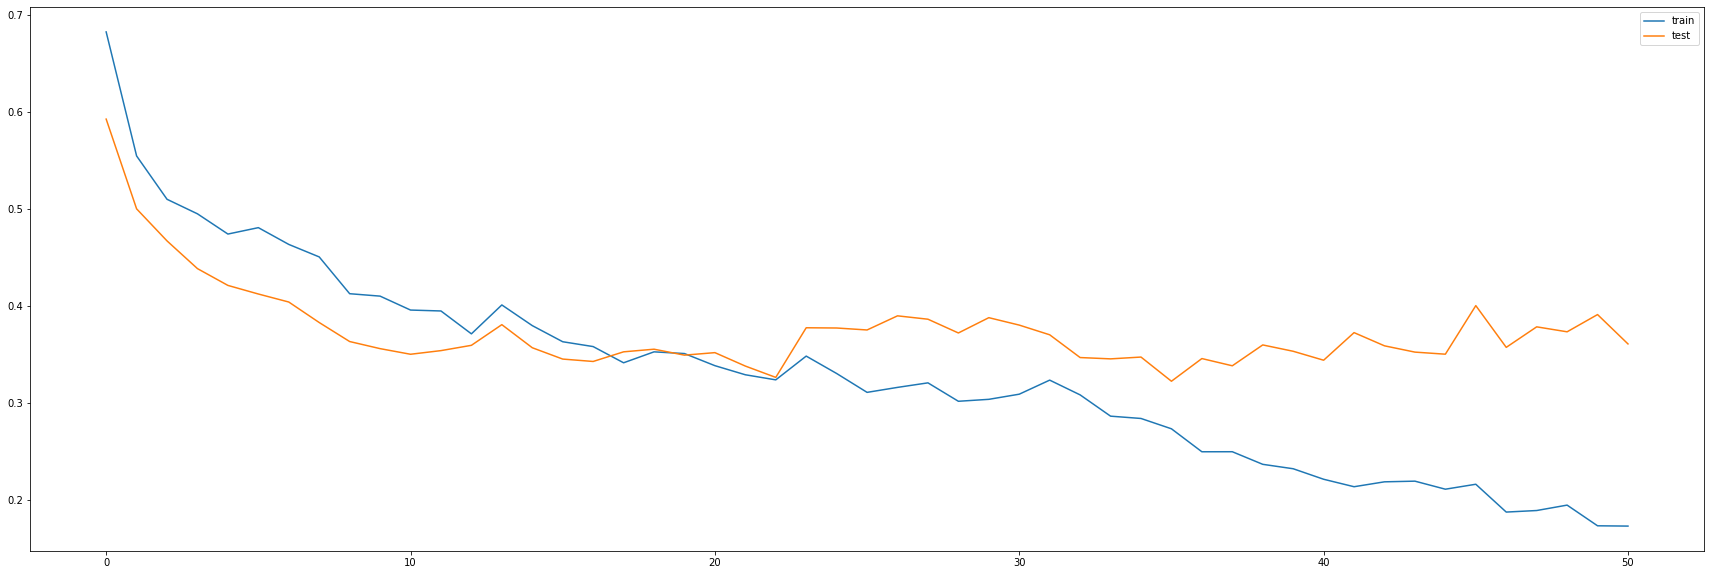

In [154]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [155]:
y_pred = model3.predict(X_test)
y_pred.shape, y_test.shape

11/11 [==============================] - 1s 8ms/step


((351, 1), (351,))

In [156]:
y_train_inv = load_transformer_daily.inverse_transform(y_train.reshape(1, -1))
y_test_inv = load_transformer_daily.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = load_transformer_daily.inverse_transform(y_pred)

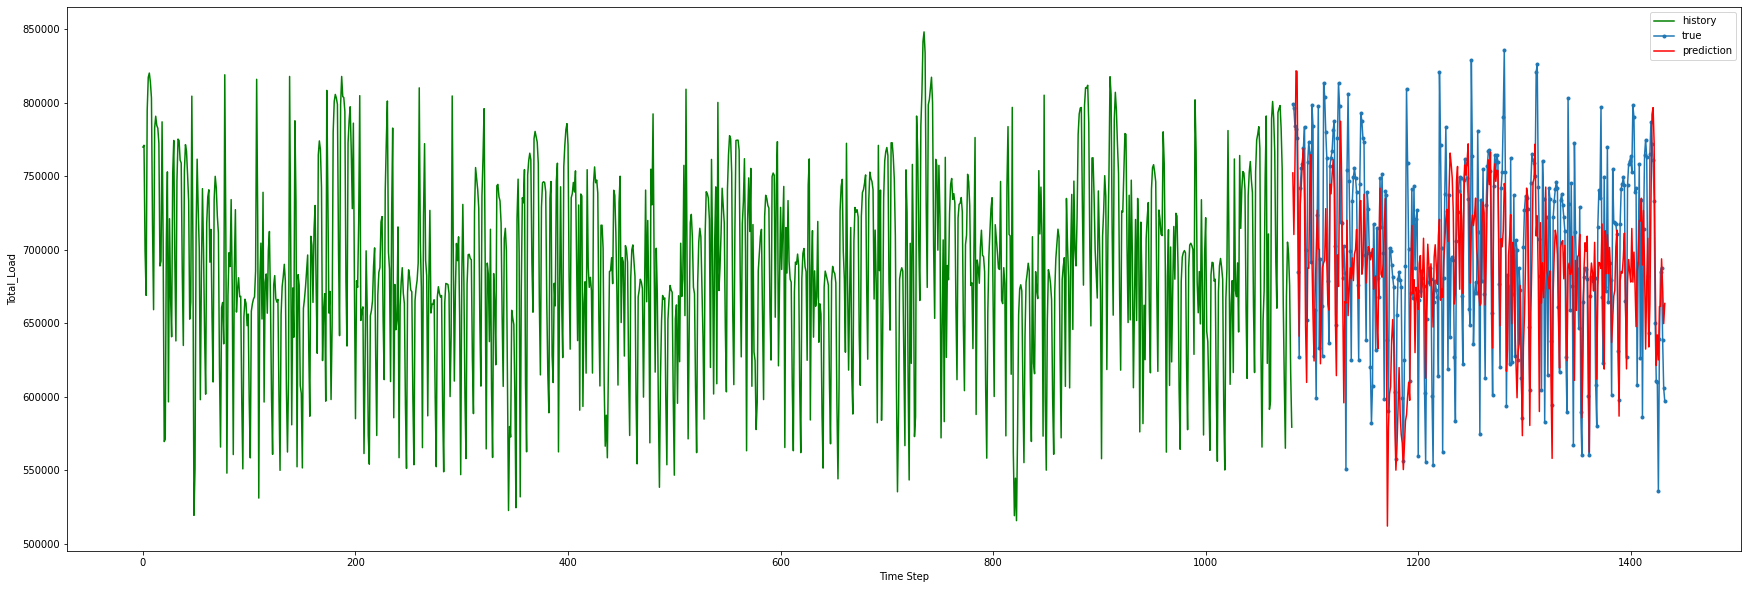

In [157]:
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Total_Load')
plt.xlabel('Time Step')
plt.legend()
plt.show();
plt.rcParams['figure.figsize'] = [30, 10]

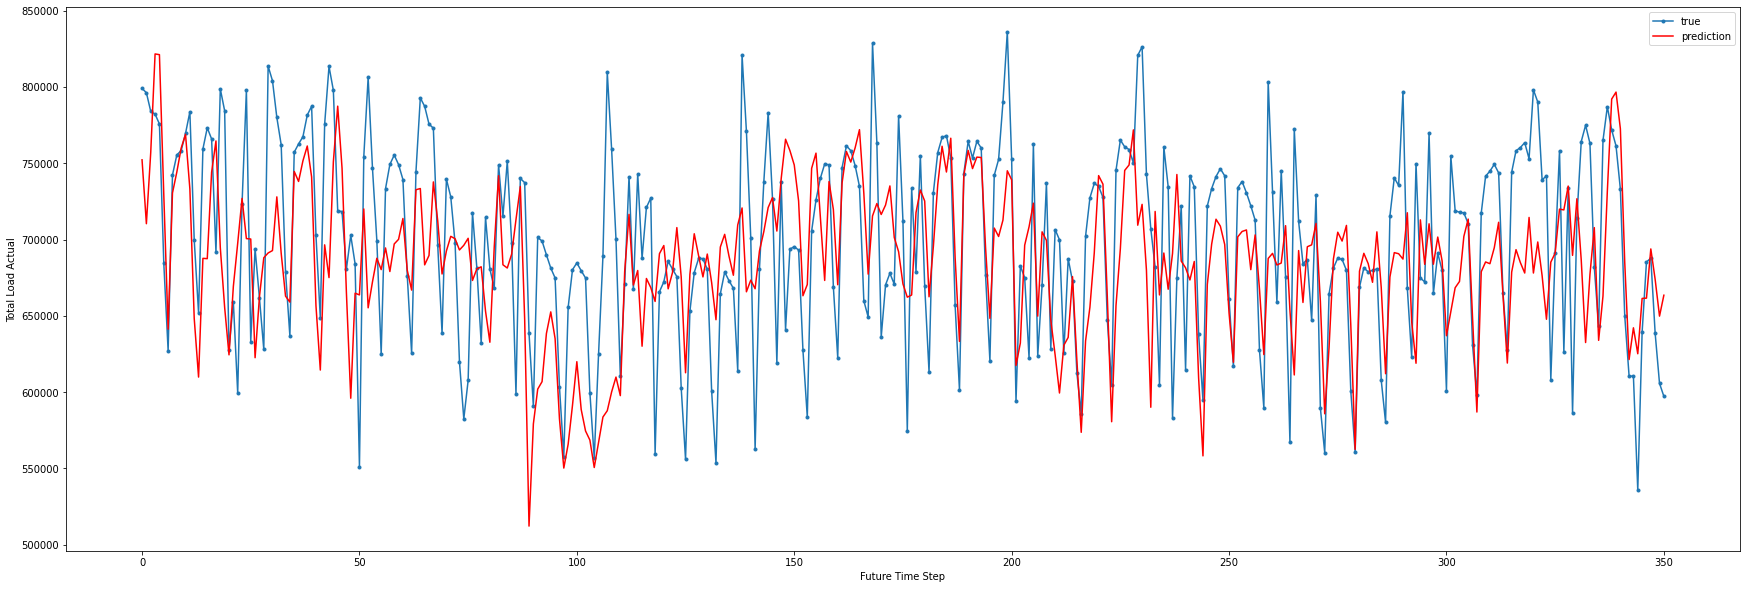

In [158]:
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Total Load Actual')
plt.xlabel('Future Time Step')
plt.legend()
plt.show();

In [159]:
print('R2 Score for LSTM Model =',r2_score(y_test_inv.flatten(), y_pred_inv.flatten()))
print('MAPE Score for LSTM Model=', mean_absolute_percentage_error(y_test_inv.flatten(), y_pred_inv.flatten()))
print('MAE Score for LSTM Model=', mean_absolute_error(y_test_inv.flatten(), y_pred_inv.flatten()))

R2 Score for LSTM Model = 0.15797170641709446
MAPE Score for LSTM Model= 0.067245489673455
MAE Score for LSTM Model= 46968.71314102564


# Loaded Module Testing

In [216]:
from tensorflow.keras.models import load_model
loaded_model = load_model('Model_Batch_size_8Epoch80.h5')

In [217]:
y_pred = loaded_model.predict(X_test)
y_pred.shape, y_test.shape

11/11 [==============================] - 0s 9ms/step


((351, 1), (351,))

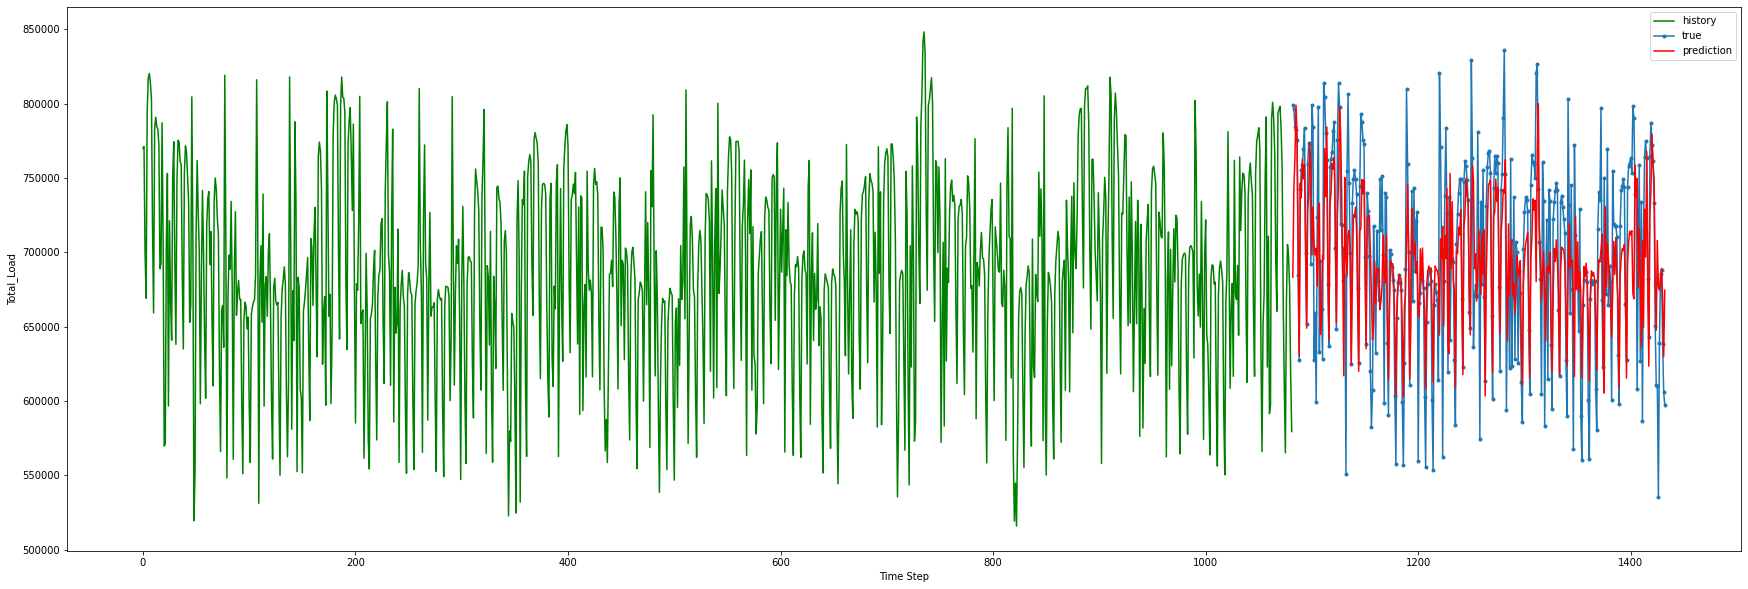

In [218]:
y_train_inv = load_transformer_daily.inverse_transform(y_train.reshape(1, -1))
y_test_inv = load_transformer_daily.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = load_transformer_daily.inverse_transform(y_pred)
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Total_Load')
plt.xlabel('Time Step')
plt.legend()
plt.show();
plt.rcParams['figure.figsize'] = [30, 10]

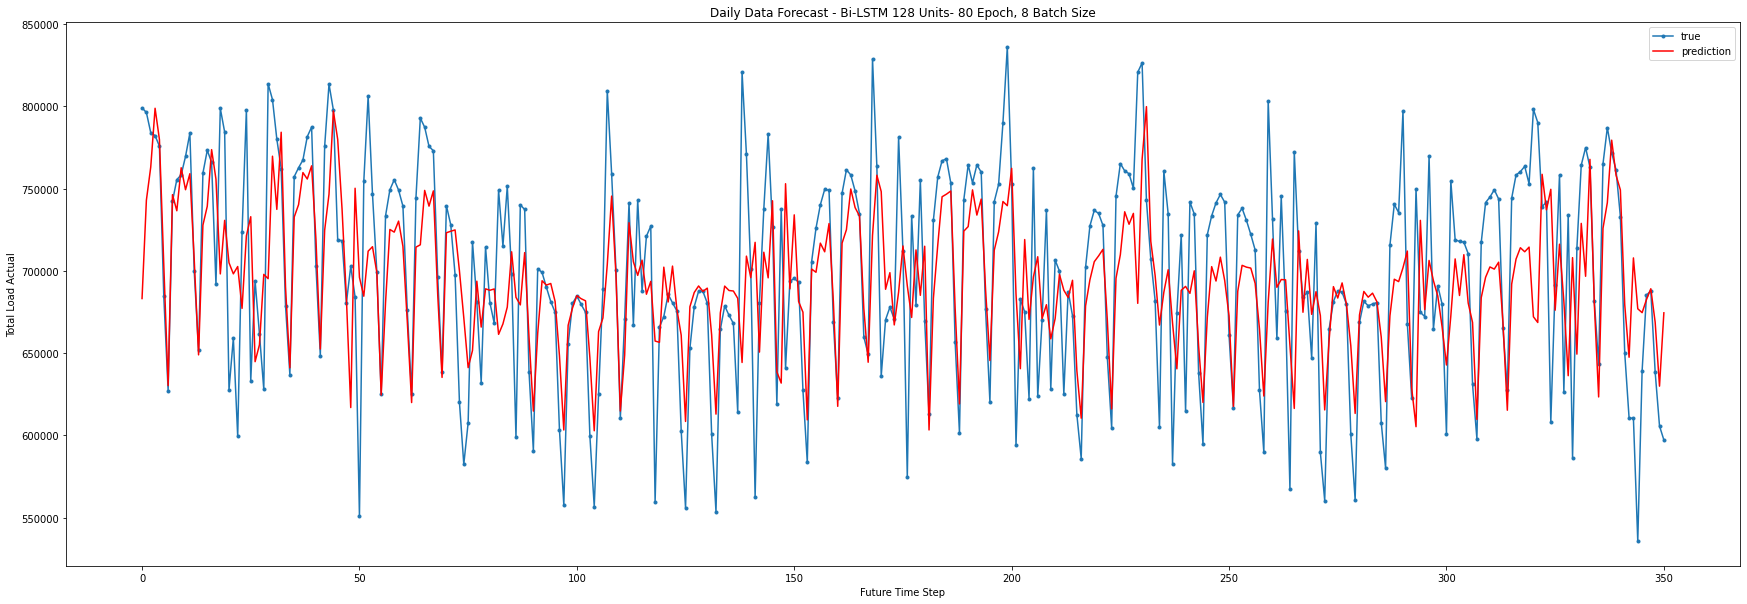

<Figure size 2160x720 with 0 Axes>

In [219]:
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Total Load Actual')
plt.xlabel('Future Time Step')
plt.title('Daily Data Forecast - Bi-LSTM 128 Units- 80 Epoch, 8 Batch Size')
plt.legend()

plt.show();
plt.savefig('modelgood')

In [220]:
print('R2 Score for LSTM Model =',r2_score(y_test_inv.flatten(), y_pred_inv.flatten()))
print('MAPE Score for LSTM Model=', mean_absolute_percentage_error(y_test_inv.flatten(), y_pred_inv.flatten()))
print('MAE Score for LSTM Model=', mean_absolute_error(y_test_inv.flatten(), y_pred_inv.flatten()))

R2 Score for LSTM Model = 0.3911967760007995
MAPE Score for LSTM Model= 0.054290675296675556
MAE Score for LSTM Model= 37495.31588319088


# Weather data(belki kullanırım) 

In [2]:
wdf = pd.read_csv('weather_features.csv')
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

In [7]:
wdf.describe()

temp       temp_min       temp_max      pressure  \
count  178396.000000  178396.000000  178396.000000  1.783960e+05   
mean      289.618605     288.330442     291.091267  1.069261e+03   
std         8.026199       7.955491       8.612454  5.969632e+03   
min       262.240000     262.240000     262.240000  0.000000e+00   
25%       283.670000     282.483602     284.650000  1.013000e+03   
50%       289.150000     288.150000     290.150000  1.018000e+03   
75%       295.150000     293.730125     297.150000  1.022000e+03   
max       315.600000     315.150000     321.150000  1.008371e+06   

            humidity    wind_speed       wind_deg        rain_1h  \
count  178396.000000  178396.00000  178396.000000  178396.000000   
mean       68.423457       2.47056     166.591190       0.075492   
std        21.902888       2.09591     116.611927       0.398847   
min         0.000000       0.00000       0.000000       0.000000   
25%        53.000000       1.00000      55.000000       0.000000   
50%        72.000000       2.00000     177.000000       0.000000   
75%        87.000000       4.00000     270.000000       0.000000   
max       100.000000     133.00000     360.000000      12.000000   

             rain_3h        snow_3h     clouds_all     weather_id  
count  178396.000000  178396.000000  178396.000000  178396.000000  
mean        0.000380       0.004763      25.073292     759.831902  
std         0.007288       0.222604      30.774129     108.733223  
min         0.000000       0.000000       0.000000     200.000000  
25%         0.000000       0.000000       0.000000     800.000000  
50%         0.000000       0.000000      20.000000     800.000000  
75%         0.000000       0.000000      40.000000     801.000000  
max         2.315000      21.500000     100.000000     804.000000